# Setup

In [195]:
%run ../../setup.ipynb

# Carico dati

In [196]:
# cartella dove ci sono i dati da analizzare
folder = "../../setup_dati/"

# importo dati
df_all = pd.read_csv(folder+"df_all_data.csv", sep=',').drop(columns=['Unnamed: 0'])
df_all["doc_index"] = df_all["doc_index"].apply(str)

In [197]:
df_all = calcola_scarto(df_all)

In [198]:
df_all

,worker_id,paid,task_id,batch_name,unit_id,try_last,try_current,action,time_submit,time_submit_parsed,...,global_outcome,global_form_validity,gold_checks,time_spent_check,time_check_amount,quartile,mean,sovra,scarto,scarto_medio
0,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:21:27 GMT",2022-08-23 12:21:27 00:00,...,True,True,True,True,True,other,3.4,other,0,0.833333
1,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Finish,"Tue, 23 Aug 2022 12:23:46 GMT",2022-08-23 12:23:46 00:00,...,True,True,True,True,True,other,1.4,other,0,0.833333
2,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:02:59 GMT",2022-08-23 12:02:59 00:00,...,True,True,True,True,True,correct_false,1.2,pants-on-fire,1,0.833333
3,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:09:17 GMT",2022-08-23 12:09:17 00:00,...,True,True,True,True,True,other,2.6,other,2,0.833333
4,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:12:09 GMT",2022-08-23 12:12:09 00:00,...,True,True,True,True,True,other,2.7,other,2,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,6301b7caed960c3930057c7a,True,FakeNewsMultidimensional,V4-Prolific-1,unit_75,1,1,Next,"Tue, 23 Aug 2022 10:57:48 GMT",2022-08-23 10:57:48 00:00,...,True,True,True,True,True,other,2.1,other,3,1.666667
1195,6301b7caed960c3930057c7a,True,FakeNewsMultidimensional,V4-Prolific-1,unit_75,1,1,Next,"Tue, 23 Aug 2022 11:00:57 GMT",2022-08-23 11:00:57 00:00,...,True,True,True,True,True,other,1.1,other,1,1.666667
1196,6301b7caed960c3930057c7a,True,FakeNewsMultidimensional,V4-Prolific-1,unit_75,1,1,Next,"Tue, 23 Aug 2022 11:06:10 GMT",2022-08-23 11:06:10 00:00,...,True,True,True,True,True,wrong_true,3.2,true,1,1.666667
1197,6301b7caed960c3930057c7a,True,FakeNewsMultidimensional,V4-Prolific-1,unit_75,1,1,Next,"Tue, 23 Aug 2022 11:09:15 GMT",2022-08-23 11:09:15 00:00,...,True,True,True,True,True,other,2.6,other,3,1.666667


RQ2 : analisi degli statement

# Analisi

Poichè sto analizzando gli statement e nel dataset df_all ho tante occorrenze dello stesso (pocihè ognuno è stato valutato da 10 worker diversi) tengo 1 occorrenza di ciascuno

In [199]:
df_analisi = df_all.copy()

In [200]:
dimensioni_da_analizzare = ["doc_index", 
                            "doc_speaker_party",
                            "doc_statement_date"]

quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]

### sistemo dati

In [201]:
# quanti valori unici ci sono per ogni dimensione
for dimensione in dimensioni_da_analizzare:
    print(dimensione, len(df_analisi[dimensione].unique()))

doc_index 8
doc_speaker_party 2
doc_statement_date 66


In [202]:
df_analisi[dimensioni_da_analizzare].head()

,doc_index,doc_speaker_party,doc_statement_date
0,6.0,DEM,2022-03-15
1,7.0,DEM,2022-06-13
2,0.0,REP,2022-04-04
3,2.0,DEM,2022-05-27
4,3.0,DEM,2022-07-13


In [203]:
for index, row in df_analisi.iterrows():
    mese = row["doc_statement_date"]
    mese = float(mese[5:7])
    #row["doc_statement_date"] = mese
    df_analisi.at[index,"doc_statement_date"] = mese

In [204]:
for dimensione in dimensioni_da_analizzare:
    print(dimensione, len(df_analisi[dimensione].unique()))

doc_index 8
doc_speaker_party 2
doc_statement_date 11


In [205]:
df_analisi[dimensioni_da_analizzare].head()

,doc_index,doc_speaker_party,doc_statement_date
0,6.0,DEM,3.0
1,7.0,DEM,6.0
2,0.0,REP,4.0
3,2.0,DEM,5.0
4,3.0,DEM,7.0


In [206]:
df_analisi.columns

Index(['worker_id', 'paid', 'task_id', 'batch_name', 'unit_id', 'try_last',
       'try_current', 'action', 'time_submit', 'time_submit_parsed',
       'doc_index', 'doc_id', 'doc_fact_check_ground_truth_label',
       'doc_fact_check_ground_truth_value', 'doc_fact_check_source',
       'doc_speaker_name', 'doc_speaker_party', 'doc_statement_date',
       'doc_statement_description', 'doc_statement_text', 'doc_evidence_url',
       'doc_completeness_value', 'doc_completeness_label',
       'doc_completeness_index', 'doc_completeness_description',
       'doc_comprehensibility_value', 'doc_comprehensibility_label',
       'doc_comprehensibility_index', 'doc_comprehensibility_description',
       'doc_precision_value', 'doc_precision_label', 'doc_precision_index',
       'doc_precision_description', 'doc_informativeness_value',
       'doc_informativeness_label', 'doc_informativeness_index',
       'doc_informativeness_description', 'doc_unbiasedness_value',
       'doc_unbiasedness_labe

In [207]:
df_analisi["correct_false"] = 0
df_analisi["correct_true"] = 0
df_analisi["wrong_false"] = 0
df_analisi["wrong_true"] = 0

for index, row in df_analisi.iterrows():
    if row ["quartile"] == "correct_false":
        df_analisi.loc[index, "correct_false"] = 1
    if row ["quartile"] == "correct_true":
        df_analisi.loc[index, "correct_true"] = 1
    if row ["quartile"] == "wrong_false":
        df_analisi.loc[index, "wrong_false"] = 1
    if row ["quartile"] == "wrong_true":
        df_analisi.loc[index, "wrong_true"] = 1
        

In [208]:
df_analisi["trimestre"] = 0
df_analisi["quadrimestre"] = 0
df_analisi["start_or_end_of_the_year"] = 0
df_analisi["middle_of_the_year"] = 0

for index, row in df_analisi.iterrows():
    mese = row["doc_statement_date"]
    if mese <= 3:
        df_analisi.at[index,"trimestre"] = 1
    if mese > 3 and mese <= 6:
        df_analisi.at[index,"trimestre"] = 2
    if mese > 6 and mese <= 9:
        df_analisi.at[index,"trimestre"] = 3
    if mese > 9 and mese <= 12:
        df_analisi.at[index,"trimestre"] = 4
    if mese <= 4:
        df_analisi.at[index,"quadrimestre"] = 1
    if mese > 4 and mese <= 8:
        df_analisi.at[index,"quadrimestre"] = 2
    if mese > 8 and mese <= 12:
        df_analisi.at[index,"quadrimestre"] = 3
    if mese == 1 or mese == 12 or mese == 2 or mese == 11:
        df_analisi.at[index,"start_or_end_of_the_year"] = 1
    if mese == 5 or mese == 6 or mese == 7 :
        df_analisi.at[index,"middle_of_the_year"] = 1

In [209]:
df_analisi["index_iniziali"] = 0
df_analisi["index_finali"] = 0

for index, row in df_analisi.iterrows():
    if float(row["doc_index"]) < 4:
        df_analisi.at[index,"index_iniziali"] = 1
    if float(row["doc_index"]) > 4:
        df_analisi.at[index,"index_finali"] = 1
    

In [210]:
df_analisi = df_analisi[["worker_id","unit_id","doc_id","doc_statement_text","doc_index","index_iniziali","index_finali","doc_speaker_party","doc_statement_date","trimestre","quadrimestre","middle_of_the_year","start_or_end_of_the_year","quartile","doc_truthfulness_index","mean","sovra","doc_fact_check_ground_truth_label","scarto",'wrong_false', 'correct_false', 'wrong_true', 'correct_true']]

In [211]:
df_analisi.head()

,worker_id,unit_id,doc_id,doc_statement_text,doc_index,index_iniziali,index_finali,doc_speaker_party,doc_statement_date,trimestre,...,quartile,doc_truthfulness_index,mean,sovra,doc_fact_check_ground_truth_label,scarto,wrong_false,correct_false,wrong_true,correct_true
0,55b645b1fdf99b1c02906872,unit_145,joni-ernst-target-describing-11th-hour-obama-r...,"The Obama administration issued an ""11th-hour ...",6.0,0,1,DEM,3.0,1,...,other,4.0,3.4,other,mostly-true,0,0,0,0,0
1,55b645b1fdf99b1c02906872,unit_145,gop-challenger-overstates-parole-boards-record...,âWeâve got a parole board right now that h...,7.0,0,1,DEM,6.0,2,...,other,1.0,1.4,other,false,0,0,0,0,0
2,55b645b1fdf99b1c02906872,unit_145,greene-twists-logic-and-facts-pedophilia-charg...,"Says Sens. Lisa Murkowski, Susan Collins and M...",0.0,1,0,REP,4.0,2,...,correct_false,1.0,1.2,pants-on-fire,pants-on-fire,1,0,1,0,0
3,55b645b1fdf99b1c02906872,unit_145,barnes-partially-right-claim-johnson-has-recei...,"Says U.S. Sen. Ron Johnson, his prospective op...",2.0,1,0,DEM,5.0,2,...,other,1.0,2.6,other,half-true,2,0,0,0,0
4,55b645b1fdf99b1c02906872,unit_145,david-jolly-says-kathleen-peters-wont-take-sta...,"""Kathleen Peters refuses to âtake a standâ...",3.0,1,0,DEM,7.0,3,...,other,4.0,2.7,other,barely-true,2,0,0,0,0


In [212]:
# creo i vari df per le analisi
def crea_df_per_analisi(df_analisi):
    df_all = df_analisi.copy()

    df_false = df_analisi[df_analisi["sovra"] == "pants-on-fire"]
    df_true = df_analisi[df_analisi["sovra"] == "true"]

    df_wrong_false = df_analisi[df_analisi["quartile"] == "wrong_false"]
    df_correct_false = df_analisi[df_analisi["quartile"] == "correct_false"]
    df_wrong_true = df_analisi[df_analisi["quartile"] == "wrong_true"]
    df_correct_true = df_analisi[df_analisi["quartile"] == "correct_true"]

    df_wrong = df_wrong_false.append(df_wrong_true)
    df_correct = df_correct_true.append(df_correct_false)

    DF_no_quartili = [["df_all",df_all],["df_false",df_false],["df_true",df_true],["df_wrong",df_wrong],["df_correct",df_correct]]
    DF = [["df_all",df_all],["df_false",df_false],["df_true",df_true],["df_wrong",df_wrong],["df_correct",df_correct],["df_wrong_false",df_wrong_false],["df_correct_false",df_correct_false],["df_correct_true",df_correct_true],["df_wrong_true",df_wrong_true]]
    return df_all, df_false, df_true , df_wrong, df_correct, df_wrong_false, df_correct_false, df_correct_true, df_wrong_true, DF_no_quartili, DF

In [213]:
df_all, df_false, df_true , df_wrong, df_correct, df_wrong_false, df_correct_false, df_correct_true, df_wrong_true, DF_no_quartili, DF = crea_df_per_analisi(df_analisi)

In [214]:
df_all.groupby("quartile").mean()["scarto"]

quartile
correct_false    1.000000
correct_true     0.683333
other            1.247500
other_false      1.787879
other_true       1.100000
wrong_false      3.100000
wrong_true       2.080000
Name: scarto, dtype: float64

## Analisi con Anova

Tuttavia, ci sono alcune linee guida generali che possono essere utilizzate per interpretare i valori di ω²:

- Valori molto bassi: solitamente ω² inferiore a 0,01 indica che la variabile indipendente ha una relazione molto debole o trascurabile con la variabile dipendente.

- Valori bassi: ω² compreso tra 0,01 e 0,06 indica una relazione debole o piccola tra la variabile indipendente e la variabile dipendente.

- Valori medi: ω² compreso tra 0,06 e 0,14 indica una relazione moderata tra la variabile indipendente e la variabile dipendente.

- Valori alti: ω² compreso tra 0,14 e 0,39 indica una relazione moderatamente forte tra la variabile indipendente e la variabile dipendente.

- Valori molto alti: ω² superiore a 0,39 indica una relazione molto forte tra la variabile indipendente e la variabile dipendente.

In [215]:
for variabile_interesse in ["doc_truthfulness_index", "mean"]:
    for df in DF_no_quartili:
        
        
        results = ols(
            f'''
                {variabile_interesse} ~ C(index_iniziali) + C(doc_speaker_party) + C(start_or_end_of_the_year)"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ C(index_iniziali) + C(doc_speaker_party) + C(start_or_end_of_the_year) in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
doc_truthfulness_index ~ C(index_iniziali) + C(doc_speaker_party) + C(start_or_end_of_the_year) in df_correct


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),213.821378,1.0,213.821378,102.078038,3.266239e-17,0.484342,0.477333
C(index_iniziali),3.503345,1.0,3.503345,1.672492,1.987364e-01,0.007936,0.003176
C(start_or_end_of_the_year),2.106094,1.0,2.106094,1.005447,3.182797e-01,0.004771,0.000026
Residual,222.036655,106.0,2.094685,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-2.8821,0.0,-3.4524,-2.3119,True


----------------------------------------------------------------------------------------------------
mean ~ C(index_iniziali) + C(doc_speaker_party) + C(start_or_end_of_the_year) in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),20.404422,1.0,20.404422,36.916754,6.352646e-09,0.158427,0.153477
C(index_iniziali),0.393392,1.0,0.393392,0.711745,3.998987e-01,0.003054,-0.001232
C(start_or_end_of_the_year),0.216411,1.0,0.216411,0.391542,5.322217e-01,0.001680,-0.002600
Residual,107.779312,195.0,0.552714,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-0.7116,0.0,-0.9376,-0.4857,True


----------------------------------------------------------------------------------------------------
mean ~ C(index_iniziali) + C(doc_speaker_party) + C(start_or_end_of_the_year) in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),28.229218,1.0,28.229218,177.600253,2.881011e-29,0.470420,0.466535
C(start_or_end_of_the_year),0.625186,1.0,0.625186,3.933275,4.873598e-02,0.010418,0.007749
C(index_iniziali),0.000345,1.0,0.000345,0.002168,9.629076e-01,0.000006,-0.002636
Residual,31.153822,196.0,0.158948,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-0.7792,0.0,-0.8932,-0.6651,True


----------------------------------------------------------------------------------------------------
mean ~ C(index_iniziali) + C(doc_speaker_party) + C(start_or_end_of_the_year) in df_wrong


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),1.704384,1.0,1.704384,25.837072,0.000002,0.211578,0.201737
C(start_or_end_of_the_year),0.015484,1.0,0.015484,0.234721,0.629148,0.001922,-0.006216
C(index_iniziali),0.002918,1.0,0.002918,0.044236,0.833861,0.000362,-0.007763
Residual,6.332796,96.0,0.065967,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-0.319,0.0,-0.4293,-0.2088,True


----------------------------------------------------------------------------------------------------
mean ~ C(index_iniziali) + C(doc_speaker_party) + C(start_or_end_of_the_year) in df_correct


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),213.579985,1.0,213.579985,257.428328,3.985834e-30,0.700053,0.695443
C(start_or_end_of_the_year),2.071019,1.0,2.071019,2.496203,1.171007e-01,0.006788,0.004058
C(index_iniziali),1.495217,1.0,1.495217,1.802188,1.823162e-01,0.004901,0.002176
Residual,87.944783,106.0,0.829668,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-2.8821,0.0,-3.2437,-2.5206,True


uso anova per verificare la correlazione tra l'appartenenza a un gruppo ristretto (quartili) e le dimensioni prese in esame

In [216]:
valore_soglia = 0.06

In [217]:
for variabile_interesse in ["correct_true", "wrong_true"]:
    for df in [["df_all",df_all], ["df_true",df_true]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year)"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year) in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
correct_true ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year) in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),11.233589,1.0,11.233589,74.433622,2.132822e-15,0.272430,0.267790
C(index_iniziali),0.419505,1.0,0.419505,2.779636,9.706687e-02,0.010174,0.006490
C(middle_of_the_year),0.001225,1.0,0.001225,0.008115,9.283109e-01,0.000030,-0.003617
Residual,29.580495,196.0,0.150921,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-0.5,0.0,-0.6108,-0.3892,True


----------------------------------------------------------------------------------------------------
wrong_true ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year) in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),18.816821,1.0,18.816821,198.769532,1.263391e-31,0.500988,0.497215
C(index_iniziali),0.163309,1.0,0.163309,1.725102,1.905730e-01,0.004348,0.001823
C(middle_of_the_year),0.024627,1.0,0.024627,0.260150,6.105913e-01,0.000656,-0.001860
Residual,18.554639,196.0,0.094667,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,0.625,0.0,0.5374,0.7126,True


In [218]:
for variabile_interesse in ["correct_false", "wrong_false"]:
    for df in [["df_all",df_all], ["df_false",df_false]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year) """
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year) in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))
        
        

----------------------------------------------------------------------------------------------------
correct_false ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year) in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(middle_of_the_year),5.506844,1.0,5.506844,34.290905,1.985554e-08,0.146344,0.141473
C(doc_speaker_party),0.792209,1.0,0.792209,4.933055,2.749844e-02,0.021053,0.016714
C(index_iniziali),0.014839,1.0,0.014839,0.092400,7.614717e-01,0.000394,-0.003857
Residual,31.315436,195.0,0.160592,NaN,NaN,NaN,NaN


C(middle_of_the_year)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,0.3561,0.0,0.2331,0.4791,True


----------------------------------------------------------------------------------------------------
wrong_false ~ C(index_iniziali) + C(doc_speaker_party) + C(middle_of_the_year) in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),5.165174,1.0,5.165174,32.010067,5.409908e-08,0.138420,0.133519
C(middle_of_the_year),0.458454,1.0,0.458454,2.841171,9.347673e-02,0.012286,0.007927
C(index_iniziali),0.226131,1.0,0.226131,1.401397,2.379309e-01,0.006060,0.001728
Residual,31.465383,195.0,0.161361,NaN,NaN,NaN,NaN


C(doc_speaker_party)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,DEM,REP,-0.3561,0.0,-0.4791,-0.2331,True


In [219]:
tukey_results = pairwise_tukeyhsd(endog=df_false["correct_false"], 
                                        groups=df_false["middle_of_the_year"] * df_false["doc_speaker_party"], 
                                        alpha=0.05)
                
df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))


,group1,group2,meandiff,p-adj,lower,upper,reject
1,,REP,0.3561,0.0000,0.1846,0.5277,True
0,,DEM,0.3561,0.0009,0.1275,0.5848,True


L'unica dimensione che sembra essere significativa è doc_speaker_party

In [220]:
for variabile in ["doc_speaker_party"]:
    for df in DF:
        print("-" * 100)
        print(df[0])
        display(df[1].groupby(by=variabile).mean()["doc_truthfulness_index"])

----------------------------------------------------------------------------------------------------
df_all


doc_speaker_party
DEM    2.941538
REP    2.495446
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_false


doc_speaker_party
DEM    2.416667
REP    1.705036
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_true


doc_speaker_party
DEM    4.091667
REP    3.312500
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_wrong


doc_speaker_party
DEM    3.233333
REP    2.914286
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_correct


doc_speaker_party
DEM    3.857143
REP    0.975000
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_wrong_false


doc_speaker_party
DEM    3.233333
REP    2.900000
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_correct_false


doc_speaker_party
DEM    1.100
REP    0.975
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_correct_true


doc_speaker_party
DEM    4.316667
Name: doc_truthfulness_index, dtype: float64

----------------------------------------------------------------------------------------------------
df_wrong_true


doc_speaker_party
REP    2.92
Name: doc_truthfulness_index, dtype: float64

Si nota come gli statement scritti da DEMOCRATICI ricevano valutazioni in media più alte

### Frequenze relative

In [221]:
dimensioni_da_analizzare = ["doc_speaker_party", "doc_statement_date","doc_index"]

In [222]:
raccoglitore_dimensioni = crea_raccoglitore_dimensioni(df_analisi, dimensioni_da_analizzare, quartili)

In [223]:
raccoglitore_dimensioni["doc_speaker_party"]["wrong_true"].T

,0,1
valore,DEM,REP
freq_ass_all,650,549
freq_ass_sovra,120,80
freq_ass_quartile,0,50
freq_rel_all,0.542118,0.457882
freq_rel_sovra,0.6,0.4
freq_rel_quartile,0.0,1.0


In [224]:
raccoglitore_dimensioni["doc_speaker_party"]["wrong_true"]

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
0,DEM,650,120,0,0.542118,0.6,0.0
1,REP,549,80,50,0.457882,0.4,1.0


In [225]:
df = raccoglitore_dimensioni["doc_speaker_party"]["wrong_true"]

In [226]:
df["rapporto_f_a_vs_sovra"] = df["freq_ass_quartile"] / df["freq_ass_sovra"]
df["rapporto_f_a_vs_all"] = df["freq_ass_quartile"] / df["freq_ass_all"]
df["rapporto_f_r_vs_sovra"] = df["freq_rel_quartile"] / df["freq_rel_sovra"]
df["rapporto_f_r_vs_all"] = df["freq_rel_quartile"] / df["freq_rel_all"]
df

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile,rapporto_f_a_vs_sovra,rapporto_f_a_vs_all,rapporto_f_r_vs_sovra,rapporto_f_r_vs_all
0,DEM,650,120,0,0.542118,0.6,0.0,0.000,0.000000,0.0,0.000000
1,REP,549,80,50,0.457882,0.4,1.0,0.625,0.091075,2.5,2.183971


In [227]:
df_res = pd.DataFrame(columns=["correct_true", "wrong_true", "correct_false", "wrong_false"])
df_res["correct_false"] = 0
df_res["wrong_false"] = 0
df_res["correct_true"] = 0
df_res["wrong_true"] = 0
df_res["mean"] = 0

for dimensione in ["doc_speaker_party","doc_index","doc_statement_date"]:
    for quartile in quartili:
        df = raccoglitore_dimensioni[dimensione][quartile]
        
        df["rapporto_f_a_vs_sovra"] = df["freq_ass_quartile"] / df["freq_ass_sovra"]
        df["rapporto_f_a_vs_all"] = df["freq_ass_quartile"] / df["freq_ass_all"]
        df["rapporto_f_r_vs_sovra"] = df["freq_rel_quartile"] / df["freq_rel_sovra"]
        df["rapporto_f_r_vs_all"] = df["freq_rel_quartile"] / df["freq_rel_all"]
        
        df.index = df["valore"]
        df = df.drop(columns=["valore"])
        df_out = df.stack()
        df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
        df_out = df_out.to_frame().T
        df_out = df_out.add_prefix(dimensione + "_")
        df_out["quartile"] = quartile
        df_out[quartile] = 1
        df_res = df_res.append(df_out)


        
        
        

df_res

,correct_true,wrong_true,correct_false,wrong_false,mean,doc_speaker_party_freq_ass_all_DEM,doc_speaker_party_freq_ass_sovra_DEM,doc_speaker_party_freq_ass_quartile_DEM,doc_speaker_party_freq_rel_all_DEM,doc_speaker_party_freq_rel_sovra_DEM,...,doc_statement_date_freq_ass_quartile_12.0,doc_statement_date_freq_rel_all_12.0,doc_statement_date_freq_rel_sovra_12.0,doc_statement_date_freq_rel_quartile_12.0,doc_statement_date_rapporto_f_a_vs_all_12.0,doc_statement_date_rapporto_f_r_vs_all_12.0,doc_statement_date_rapporto_f_a_vs_sovra_9.0,doc_statement_date_rapporto_f_r_vs_sovra_9.0,doc_statement_date_rapporto_f_a_vs_sovra_12.0,doc_statement_date_rapporto_f_r_vs_sovra_12.0
0,NaN,NaN,NaN,1.0,NaN,650.0,60.0,30.0,0.542118,0.301508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,1.0,NaN,NaN,650.0,60.0,10.0,0.542118,0.301508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,1.0,NaN,NaN,NaN,650.0,120.0,0.0,0.542118,0.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1.0,NaN,NaN,NaN,NaN,650.0,120.0,60.0,0.542118,0.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.039401,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.039401,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN


In [228]:
df_unite = df_res.groupby("correct_true").sum().reset_index()
df_unite = df_unite.append(df_res.groupby("wrong_true").sum().reset_index())
df_unite = df_unite.append(df_res.groupby("correct_false").sum().reset_index())
df_unite = df_unite.append(df_res.groupby("wrong_false").sum().reset_index())

In [229]:
# Rimozione degli ultimi due caratteri dalle colonne
df_unite.columns = df_unite.columns.str.replace(r'\.0$', '', regex=True)

In [230]:
df_unite["quartile"] = ["correct_true", "wrong_true", "correct_false", "wrong_false"]

In [231]:
df_unite.index = ["correct_true", "wrong_true", "correct_false", "wrong_false"]
df_unite

,correct_true,wrong_true,correct_false,wrong_false,mean,doc_speaker_party_freq_ass_all_DEM,doc_speaker_party_freq_ass_sovra_DEM,doc_speaker_party_freq_ass_quartile_DEM,doc_speaker_party_freq_rel_all_DEM,doc_speaker_party_freq_rel_sovra_DEM,...,doc_statement_date_freq_rel_all_12,doc_statement_date_freq_rel_sovra_12,doc_statement_date_freq_rel_quartile_12,doc_statement_date_rapporto_f_a_vs_all_12,doc_statement_date_rapporto_f_r_vs_all_12,doc_statement_date_rapporto_f_a_vs_sovra_9,doc_statement_date_rapporto_f_r_vs_sovra_9,doc_statement_date_rapporto_f_a_vs_sovra_12,doc_statement_date_rapporto_f_r_vs_sovra_12,quartile
correct_true,1.0,0.0,0.0,0.0,0.0,650.0,120.0,60.0,0.542118,0.600000,...,0.039401,0.130435,0.142857,0.2,3.625714,0.0,0.0,0.333333,1.095238,correct_true
wrong_true,0.0,1.0,0.0,0.0,0.0,650.0,120.0,0.0,0.542118,0.600000,...,0.039401,0.130435,0.000000,0.0,0.000000,1.0,4.6,0.000000,0.000000,wrong_true
correct_false,0.0,0.0,1.0,0.0,0.0,650.0,60.0,10.0,0.542118,0.301508,...,0.039401,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,correct_false
wrong_false,0.0,0.0,0.0,1.0,0.0,650.0,60.0,30.0,0.542118,0.301508,...,0.039401,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,wrong_false


In [232]:
df_unite_mean_quartile = 0 
for index,row in df_unite.iterrows():
    m = df_all[df_all["quartile"] == row["quartile"]]["doc_truthfulness_index"].mean()
    print(row["quartile"], m)
    print(index)
    df_unite.loc[index, "mean"] = m
    

correct_true 4.316666666666666
correct_true
wrong_true 2.92
wrong_true
correct_false 1.0
correct_false
wrong_false 3.1
wrong_false


In [243]:
txt = ""
txt_variable = []
for t in df_unite.columns:
    if "_rapporto_f_r_vs" in t:
        txt = txt + f"""{t} + """
        txt_variable += [t]
txt = txt[:-2]

Buongiorno. Io sto proseguendo facendo i vari test con anova e turkey.
Avrei due domande.
- molte dimensioni che test vecchi mi davano come "importatnti" (pvalue < 0.05) anova le reputa significativamente non correlate alle variabili di mio interesse (come l'appartenenza a un gruppo che sto studiando o il valore di doc_truthfulness_index). Questo mi pare sia normale in quanto era stato detto che anova lo usavamo solo per "confermare" i test che avevo già eseguito ma non avrei trovato nulla di "nuovo". Volevo solo una conferma di ciò.
- l'unica circostanza in cui non riesco ad eseguire il test di anova (per confermare o smentire il prop test) è quando cerco di verificare la correlazione tra appartenenza a un gruppo (es news wrong_true = notizie vere valutate peggio dagli utenti,correct_false = fake news considerate maggiormente fake news dai worker ..) e la frequenza dei valori di ogni dimensione rispetto alla frequenza dello stesso valore della "sovra categoria" (notizie vere e notizie false). Allego un immagine del df che ho creato per fare questo test e il codice per eseguire il test.
L'errore che mi da è "r_matrix performs f_test for using dimensions that are asymptotically non-normal".

In [248]:
df_unite[["mean", "correct_true","wrong_true","correct_false","wrong_false"] +txt_variable ]

,mean,correct_true,wrong_true,correct_false,wrong_false,doc_speaker_party_rapporto_f_r_vs_sovra_DEM,doc_speaker_party_rapporto_f_r_vs_all_DEM,doc_speaker_party_rapporto_f_r_vs_sovra_REP,doc_speaker_party_rapporto_f_r_vs_all_REP,doc_index_rapporto_f_r_vs_sovra_0,...,doc_statement_date_rapporto_f_r_vs_sovra_6,doc_statement_date_rapporto_f_r_vs_all_6,doc_statement_date_rapporto_f_r_vs_sovra_7,doc_statement_date_rapporto_f_r_vs_all_7,doc_statement_date_rapporto_f_r_vs_all_9,doc_statement_date_rapporto_f_r_vs_all_10,doc_statement_date_rapporto_f_r_vs_all_11,doc_statement_date_rapporto_f_r_vs_all_12,doc_statement_date_rapporto_f_r_vs_sovra_9,doc_statement_date_rapporto_f_r_vs_sovra_12
correct_true,4.316667,1.0,0.0,0.0,0.0,1.666667,1.844615,0.000000,0.000000,1.111111,...,2.190476,1.648052,0.547619,0.489961,0.00,0.0,0.0,3.625714,0.0,1.095238
wrong_true,2.920000,0.0,1.0,0.0,0.0,0.000000,0.000000,2.500000,2.183971,0.833333,...,0.000000,0.000000,2.300000,2.057838,25.38,0.0,0.0,0.000000,4.6,0.000000
correct_false,1.000000,0.0,0.0,1.0,0.0,0.663333,0.368923,1.145324,1.747177,1.061333,...,3.980000,1.153636,1.326667,0.685946,0.00,0.0,0.0,0.000000,0.0,0.000000
wrong_false,3.100000,0.0,0.0,0.0,1.0,1.990000,1.106769,0.572662,0.873588,1.326667,...,0.000000,0.000000,2.653333,1.371892,0.00,0.0,0.0,0.000000,0.0,0.000000


In [246]:
txt

'doc_speaker_party_rapporto_f_r_vs_sovra_DEM + doc_speaker_party_rapporto_f_r_vs_all_DEM + doc_speaker_party_rapporto_f_r_vs_sovra_REP + doc_speaker_party_rapporto_f_r_vs_all_REP + doc_index_rapporto_f_r_vs_sovra_0 + doc_index_rapporto_f_r_vs_all_0 + doc_index_rapporto_f_r_vs_sovra_1 + doc_index_rapporto_f_r_vs_all_1 + doc_index_rapporto_f_r_vs_sovra_2 + doc_index_rapporto_f_r_vs_all_2 + doc_index_rapporto_f_r_vs_sovra_3 + doc_index_rapporto_f_r_vs_all_3 + doc_index_rapporto_f_r_vs_sovra_4 + doc_index_rapporto_f_r_vs_all_4 + doc_index_rapporto_f_r_vs_sovra_5 + doc_index_rapporto_f_r_vs_all_5 + doc_index_rapporto_f_r_vs_sovra_6 + doc_index_rapporto_f_r_vs_all_6 + doc_index_rapporto_f_r_vs_sovra_7 + doc_index_rapporto_f_r_vs_all_7 + doc_statement_date_rapporto_f_r_vs_sovra_1 + doc_statement_date_rapporto_f_r_vs_all_1 + doc_statement_date_rapporto_f_r_vs_sovra_2 + doc_statement_date_rapporto_f_r_vs_all_2 + doc_statement_date_rapporto_f_r_vs_sovra_3 + doc_statement_date_rapporto_f_r_vs_all

In [245]:
for gruppo in ["correct_true", "wrong_true", "correct_false", "wrong_false"]:

    print(f"""{gruppo} ~ {txt}""")
    
    results = ols(
        f'''
            {gruppo} ~ {txt}"""
        '''
        , data=df_unite).fit()
    aov_table = sm.stats.anova_lm(results, typ=2)
    anova_table_v = anova_table(aov_table)
    display(anova_table_v.sort_values(by="omega_sq", ascending=False))

correct_true ~ doc_speaker_party_rapporto_f_r_vs_sovra_DEM + doc_speaker_party_rapporto_f_r_vs_all_DEM + doc_speaker_party_rapporto_f_r_vs_sovra_REP + doc_speaker_party_rapporto_f_r_vs_all_REP + doc_index_rapporto_f_r_vs_sovra_0 + doc_index_rapporto_f_r_vs_all_0 + doc_index_rapporto_f_r_vs_sovra_1 + doc_index_rapporto_f_r_vs_all_1 + doc_index_rapporto_f_r_vs_sovra_2 + doc_index_rapporto_f_r_vs_all_2 + doc_index_rapporto_f_r_vs_sovra_3 + doc_index_rapporto_f_r_vs_all_3 + doc_index_rapporto_f_r_vs_sovra_4 + doc_index_rapporto_f_r_vs_all_4 + doc_index_rapporto_f_r_vs_sovra_5 + doc_index_rapporto_f_r_vs_all_5 + doc_index_rapporto_f_r_vs_sovra_6 + doc_index_rapporto_f_r_vs_all_6 + doc_index_rapporto_f_r_vs_sovra_7 + doc_index_rapporto_f_r_vs_all_7 + doc_statement_date_rapporto_f_r_vs_sovra_1 + doc_statement_date_rapporto_f_r_vs_all_1 + doc_statement_date_rapporto_f_r_vs_sovra_2 + doc_statement_date_rapporto_f_r_vs_all_2 + doc_statement_date_rapporto_f_r_vs_sovra_3 + doc_statement_date_rappo

ValueError: r_matrix performs f_test for using dimensions that are asymptotically non-normal

In [ ]:
df = []

for dimensione in ["doc_index"]:
    for quartile in quartili:
        for index,row in raccoglitore_dimensioni[dimensione][quartile].iterrows():
            
            
    



In [28]:
# analisi suando prop test sulle proporzioni
tabella_p_value = costruisci_tabella_pvalue(raccoglitore_dimensioni, dimensioni_da_analizzare, quartili,ignora_per_ptrend = ["doc_speaker_party"])
significativi = filtra_siglificativi(tabella_p_value, dimensioni_da_analizzare, quartili, 0.05,"pvalue_quartile_sovra").sort_values(by=["dimensione"], ascending=True)
significativi

,dimensione,quartile,confronto,valore_pvalue,p_trend
7,doc_speaker_party,wrong_true,pvalue_quartile_sovra,1.523971e-23,NULL
9,doc_speaker_party,correct_true,pvalue_quartile_sovra,4.052771e-14,NULL
2,doc_speaker_party,wrong_false,pvalue_quartile_sovra,1.065244e-07,NULL
17,doc_statement_date,wrong_true,pvalue_quartile_sovra,3.026736e-18,0.855613
11,doc_statement_date,wrong_false,pvalue_quartile_sovra,1.533800e-17,0.247785
14,doc_statement_date,correct_false,pvalue_quartile_sovra,2.696665e-13,0.223715
20,doc_statement_date,correct_true,pvalue_quartile_sovra,5.718496e-07,0.73214


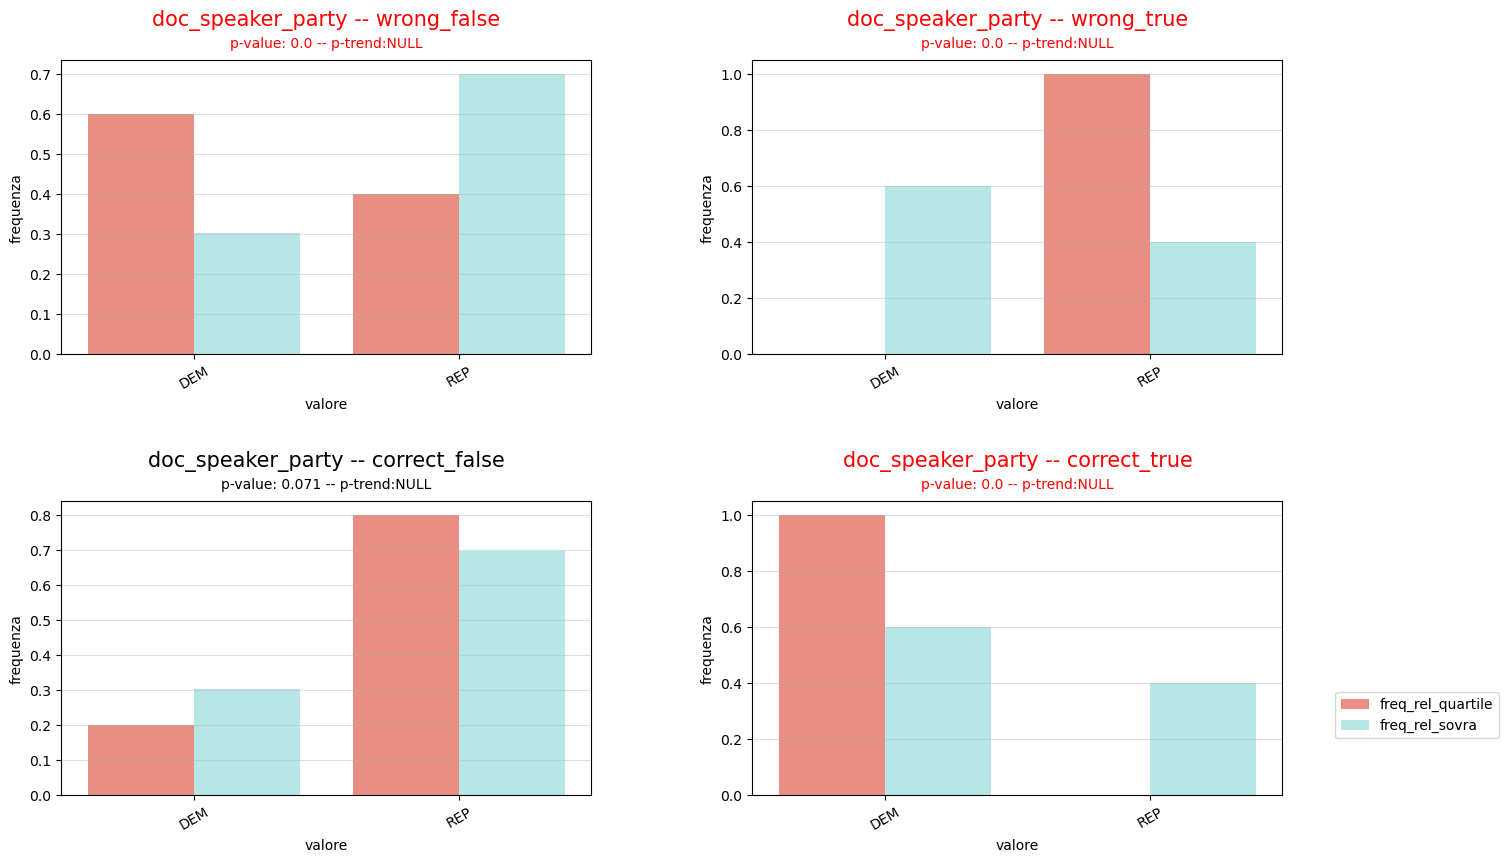

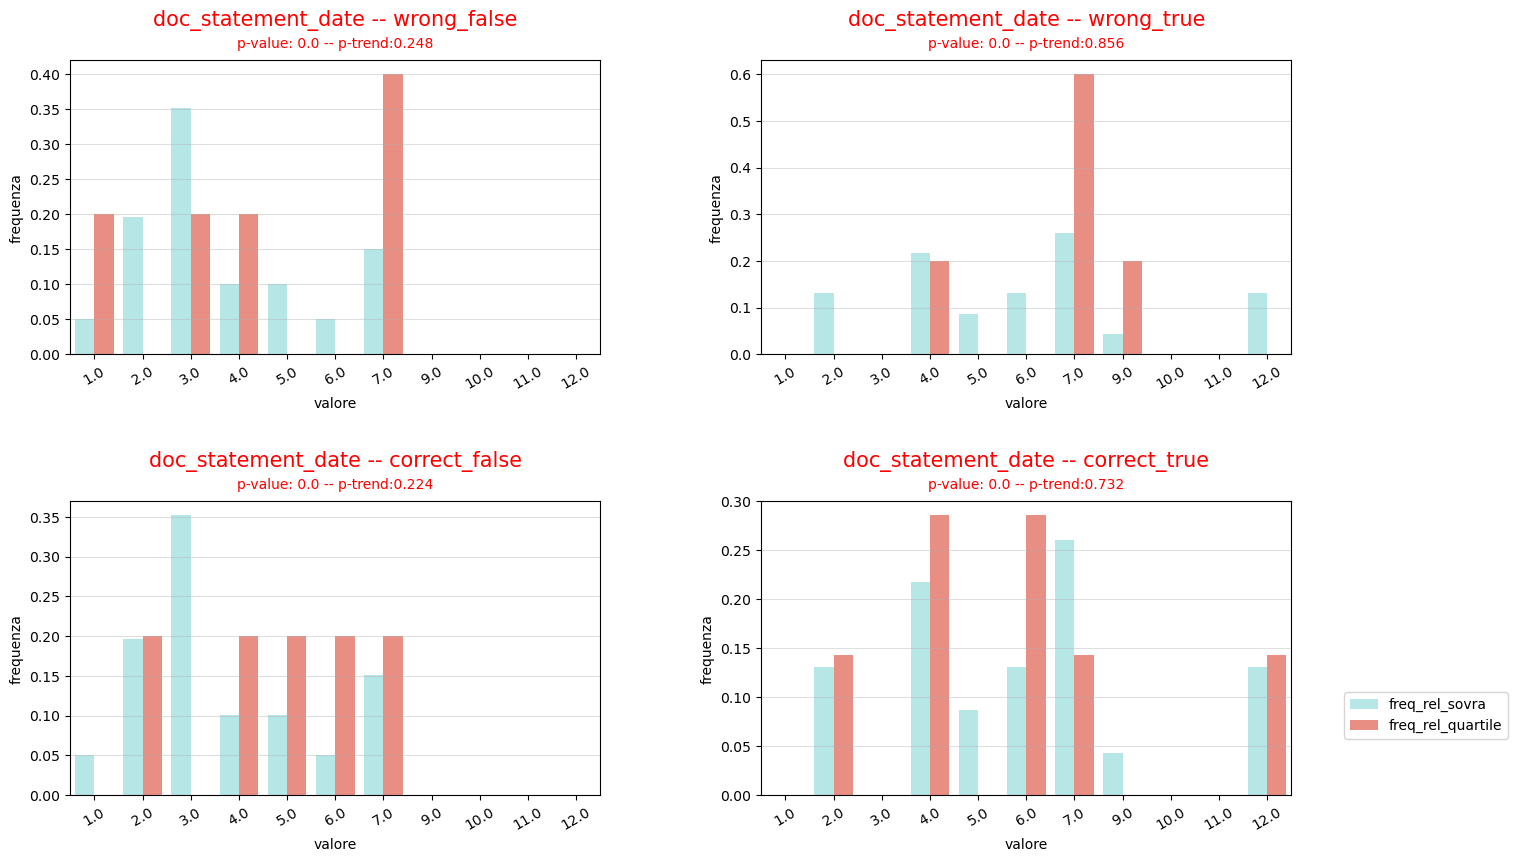

In [29]:
# solo significativi
for dimensione in significativi["dimensione"].unique():
    crea_barplot_all_anova(raccoglitore_dimensioni,tabella_p_value, dimensione,"valore")

In [30]:
df_true["doc_speaker_party"]

5       REP
10      DEM
17      REP
22      DEM
24      DEM
       ... 
1171    REP
1179    DEM
1183    REP
1187    DEM
1196    REP
Name: doc_speaker_party, Length: 200, dtype: object

In [31]:
import category_encoders as cat_encoder

In [32]:
df_all.columns

Index(['worker_id', 'unit_id', 'doc_id', 'doc_statement_text', 'doc_index',
       'index_iniziali', 'index_finali', 'doc_speaker_party',
       'doc_statement_date', 'trimestre', 'quadrimestre', 'middle_of_the_year',
       'start_or_end_of_the_year', 'quartile', 'doc_truthfulness_index',
       'mean', 'sovra', 'doc_fact_check_ground_truth_label', 'scarto',
       'wrong_false', 'correct_false', 'wrong_true', 'correct_true'],
      dtype='object')

In [33]:
df2 = df_all

# we can specify specific columns as well
encoder = cat_encoder.BinaryEncoder(cols = ["doc_index", "doc_speaker_party", "middle_of_the_year"])
  
# fitting the columns to a data frame
df_category_encoder_all = encoder.fit_transform( df2 )

In [34]:
df2 = df_true

# we can specify specific columns as well
encoder = cat_encoder.BinaryEncoder(cols = ["doc_index", "doc_speaker_party", "middle_of_the_year"])
  
# fitting the columns to a data frame
df_category_encoder_true = encoder.fit_transform( df2 )

In [73]:
df2 = df_false

# we can specify specific columns as well
encoder = cat_encoder.BinaryEncoder(cols = ["doc_index", "doc_speaker_party", "middle_of_the_year"])
  
# fitting the columns to a data frame
df_category_encoder_false = encoder.fit_transform( df2 )

In [77]:
df_category_encoder_true.columns

Index(['worker_id', 'unit_id', 'doc_id', 'doc_statement_text', 'doc_index_0',
       'doc_index_1', 'doc_index_2', 'doc_index_3', 'index_iniziali',
       'index_finali', 'doc_speaker_party_0', 'doc_speaker_party_1',
       'doc_statement_date', 'trimestre', 'quadrimestre',
       'middle_of_the_year_0', 'middle_of_the_year_1',
       'start_or_end_of_the_year', 'quartile', 'doc_truthfulness_index',
       'mean', 'sovra', 'doc_fact_check_ground_truth_label', 'scarto',
       'wrong_false', 'correct_false', 'wrong_true', 'correct_true'],
      dtype='object')

In [72]:
for variabile_interesse in ["doc_speaker_party_0", "doc_speaker_party_1"]:
    for df in [["df_all",df_category_encoder_all], ["df_true",df_category_encoder_true]]:
        
        results = ols(
        f'''
            {variabile_interesse} ~ wrong_true + correct_true"""  
        '''
        , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ wrong_true + correct_true  in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                
                if index[0] == "C":
                    print(index)
                    index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)

                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
doc_speaker_party_0 ~ wrong_true + correct_true  in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
wrong_true,14.285714,1.0,14.285714,140.714286,7.657053e-25,0.373134,0.369503
correct_true,4.000000,1.0,4.000000,39.400000,2.155627e-09,0.104478,0.101557
Residual,20.000000,197.0,0.101523,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
doc_speaker_party_1 ~ wrong_true + correct_true  in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
wrong_true,14.285714,1.0,14.285714,140.714286,7.657053e-25,0.373134,0.369503
correct_true,4.000000,1.0,4.000000,39.400000,2.155627e-09,0.104478,0.101557
Residual,20.000000,197.0,0.101523,NaN,NaN,NaN,NaN


In [76]:
for variabile_interesse in ["doc_speaker_party_0", "doc_speaker_party_1"]:
    for df in [["df_all",df_category_encoder_all], ["df_false",df_category_encoder_false]]:
        
        results = ols(
        f'''
            {variabile_interesse} ~ wrong_false + correct_false"""  
        '''
        , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ wrong_false + correct_false  in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                
                if index[0] == "C":
                    print(index)
                    index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)

                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

In [78]:
for variabile_interesse in ['doc_index_0','doc_index_1', 'doc_index_2', 'doc_index_3']:
    for df in [["df_all",df_category_encoder_all], ["df_false",df_category_encoder_false]]:
        
        results = ols(
        f'''
            {variabile_interesse} ~ wrong_false + correct_false"""  
        '''
        , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ wrong_false + correct_false  in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                
                if index[0] == "C":
                    print(index)
                    index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)

                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

In [80]:
for variabile_interesse in ['doc_index_0','doc_index_1', 'doc_index_2', 'doc_index_3']:
    for df in [["df_all",df_category_encoder_all], ["df_t",df_category_encoder_true]]:
        
        results = ols(
        f'''
            {variabile_interesse} ~ wrong_true + correct_true"""  
        '''
        , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ wrong_true + correct_true  in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                
                if index[0] == "C":
                    print(index)
                    index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)

                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

In [83]:
for variabile_interesse in ['middle_of_the_year_0', 'middle_of_the_year_1']:
    for df in [["df_all",df_category_encoder_all], ["df_false",df_category_encoder_false]]:
        
        results = ols(
        f'''
            {variabile_interesse} ~ wrong_false + correct_false"""  
        '''
        , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ wrong_false + correct_false  in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                
                if index[0] == "C":
                    print(index)
                    index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)

                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
middle_of_the_year_0 ~ wrong_false + correct_false  in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
correct_false,8.271846,1.0,8.271846,49.144795,3.745878e-11,0.187012,0.182512
wrong_false,2.969833,1.0,2.969833,17.644406,4.040782e-05,0.067143,0.063097
Residual,32.989899,196.0,0.168316,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
middle_of_the_year_1 ~ wrong_false + correct_false  in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
correct_false,8.271846,1.0,8.271846,49.144795,3.745878e-11,0.187012,0.182512
wrong_false,2.969833,1.0,2.969833,17.644406,4.040782e-05,0.067143,0.063097
Residual,32.989899,196.0,0.168316,NaN,NaN,NaN,NaN


In [86]:
df_category_encoder_false.groupby("doc_index_0").mean()["middle_of_the_year_0"]

doc_index_0
0    0.279070
1    0.444444
Name: middle_of_the_year_0, dtype: float64

In [82]:
for variabile_interesse in ['middle_of_the_year_0', 'middle_of_the_year_1']:
    for df in [["df_all",df_category_encoder_all], ["df_t",df_category_encoder_true]]:
        
        results = ols(
        f'''
            {variabile_interesse} ~ wrong_true + correct_true"""  
        '''
        , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ wrong_true + correct_true  in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                
                if index[0] == "C":
                    print(index)
                    index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)

                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

## Confronto gruppi

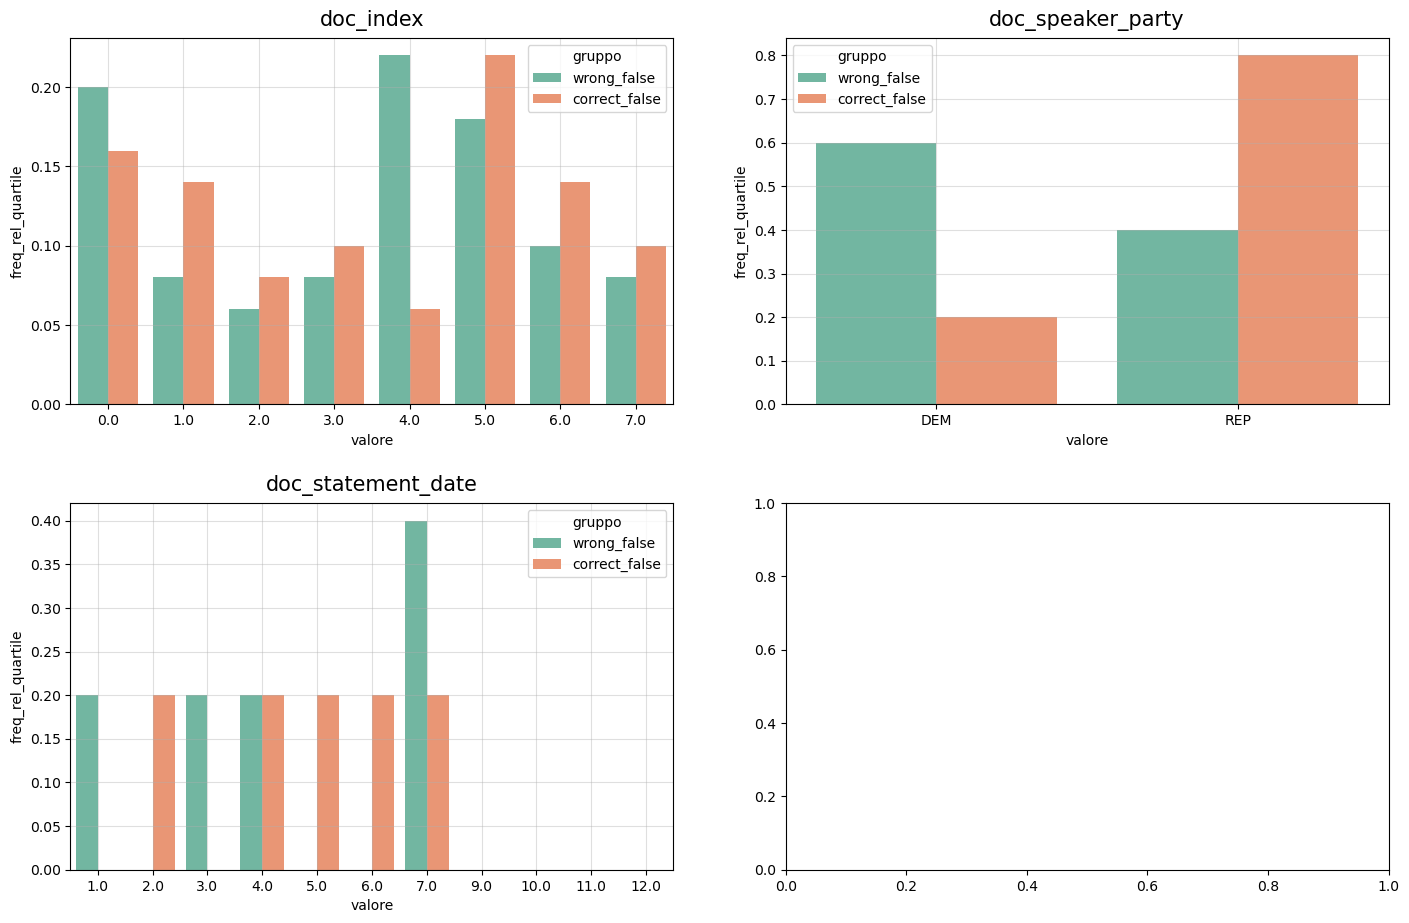

In [37]:
gruppo = ["wrong_false", "correct_false"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=False, numero_per_riga = 2)

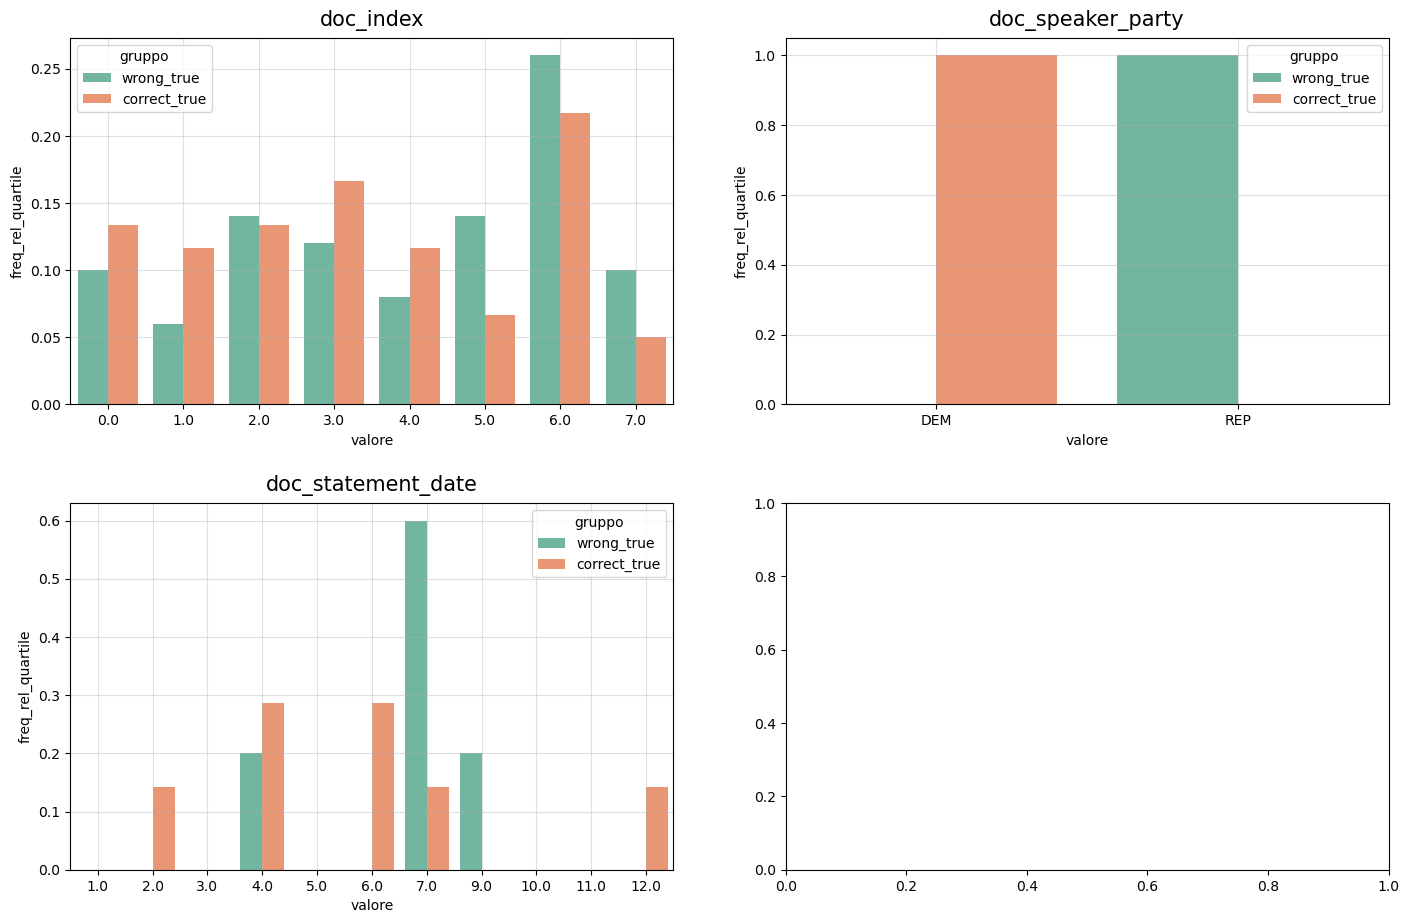

In [38]:
gruppo = ["wrong_true", "correct_true"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=False,numero_per_riga = 2)

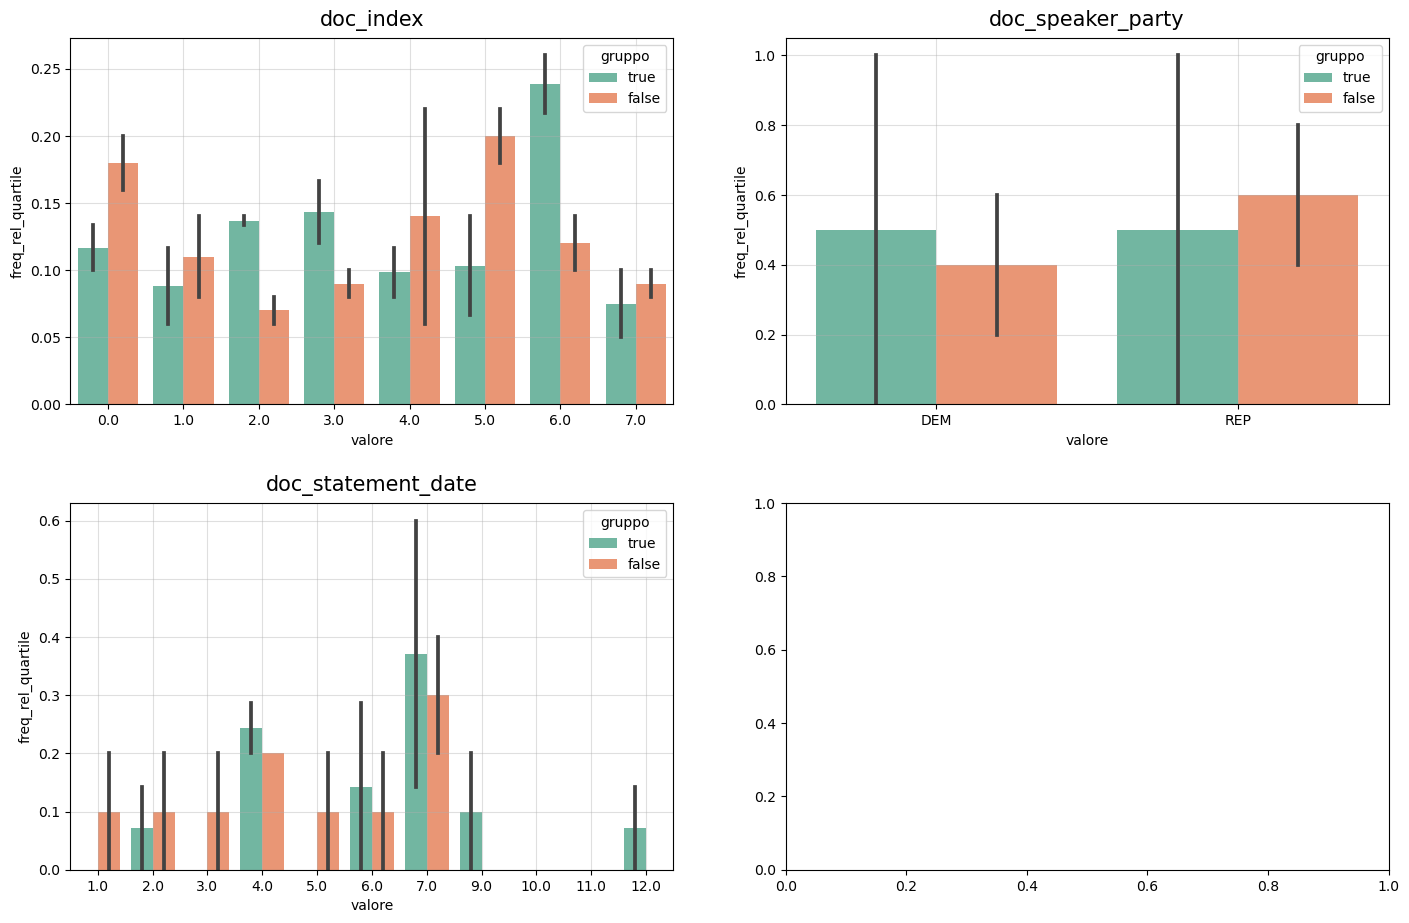

In [39]:
gruppo = [["wrong_true", "correct_true"],["wrong_false", "correct_false"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = False,names = ["true","false"],numero_per_riga = 2)

In [40]:
gruppi_quartili = [["correct_true", "wrong_true"],["wrong_false", "correct_false"]]
name_gruppi = ["true","false"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = False, name_gruppi = name_gruppi, solo_significativi = True)

true doc_index 0.013734855388193513
false doc_speaker_party 0.0028875740683071797
true doc_statement_date 5.633318416090961e-32
false doc_statement_date 3.496566060030392e-08


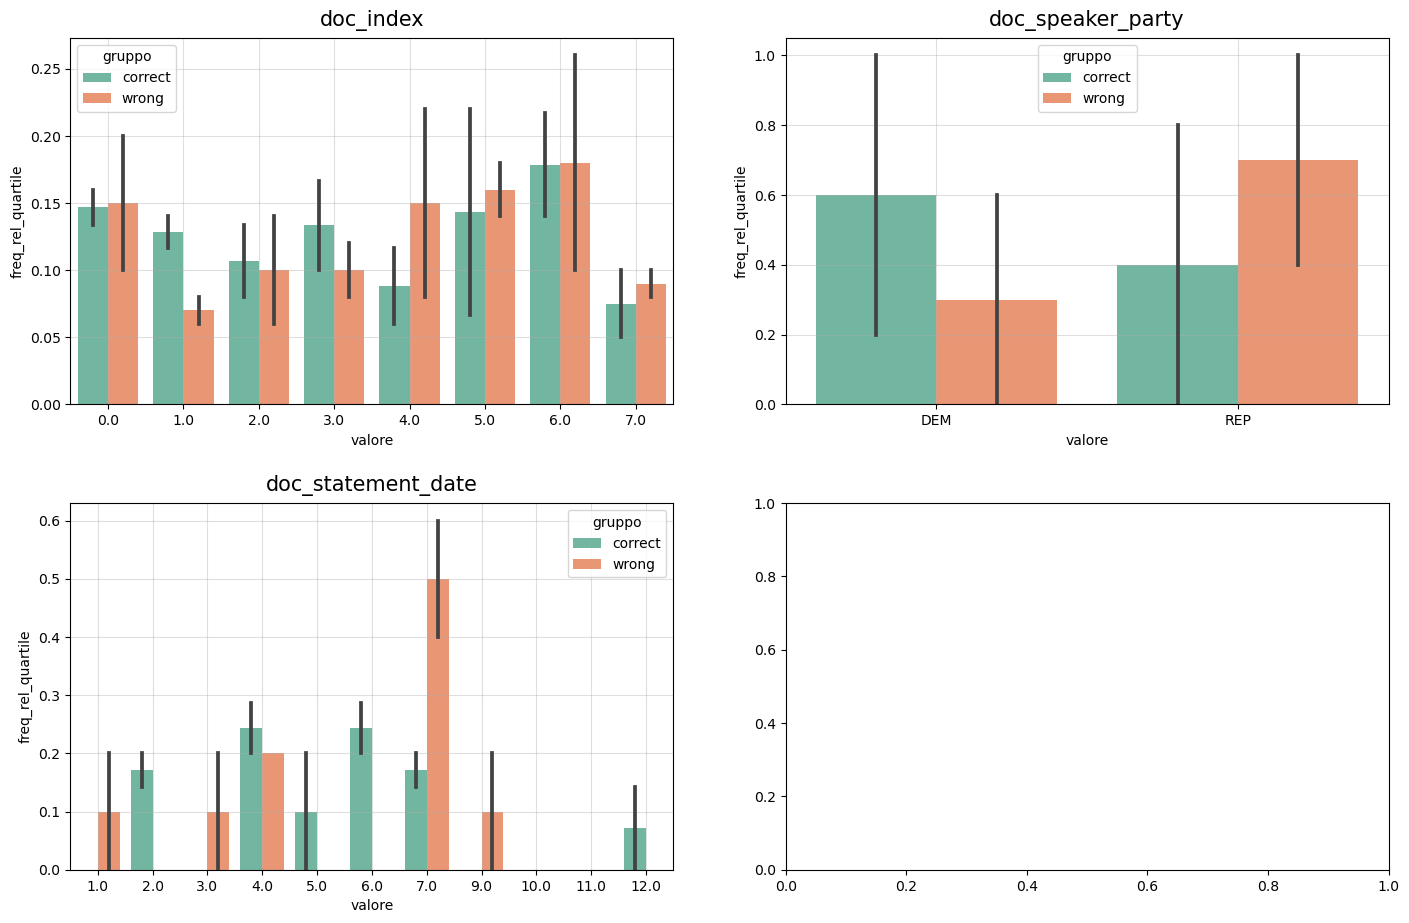

In [41]:
gruppo = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = False,names = ["correct","wrong"],numero_per_riga = 2)

In [42]:
gruppi_quartili = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
name_gruppi = ["correct","wrong"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = False, name_gruppi = name_gruppi, solo_significativi = True)

correct doc_speaker_party 0.03736574296026352
wrong doc_speaker_party 3.8562168969944933e-07
correct doc_statement_date 6.2560433020129024e-15
wrong doc_statement_date 1.3062944818499774e-42


Noto che la dimensione più interessante è doc_speaker_party

In [43]:
df_analisi[["doc_speaker_party","doc_truthfulness_index"]].groupby("doc_speaker_party").mean()

,doc_truthfulness_index
doc_speaker_party,
DEM,2.941538
REP,2.495446


In [44]:
def anova_for_appartence_to_group(variabili_indipendenti):

    for variabile_interesse in ["correct_false", "wrong_false"]:
        for df in [["df_all",df_all], ["df_false",df_false]]:
            
            results = ols(
                f'''
                    {variabile_interesse} ~ {variabili_indipendenti} """
                '''
                , data=df[1]).fit()
            aov_table = sm.stats.anova_lm(results, typ=2)
            anova_table_v = anova_table(aov_table)
            if anova_table_v["omega_sq"].max() > valore_soglia:
                print("-" * 100)
                print(f"""{variabile_interesse} ~ {variabili_indipendenti} in {df[0]}""")
                display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            for index, row in anova_table_v.iterrows():
                if row["omega_sq"] > valore_soglia:
                    print(index)
                    if index[0] == "C":
                        index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)
                    
                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))
                    
    for variabile_interesse in ["correct_true", "wrong_true"]:
        for df in [["df_all",df_all], ["df_true",df_true]]:
            
            results = ols(
                f'''
                    {variabile_interesse} ~ {variabili_indipendenti}"""
                '''
                , data=df[1]).fit()
            aov_table = sm.stats.anova_lm(results, typ=2)
            anova_table_v = anova_table(aov_table)
            if anova_table_v["omega_sq"].max() > valore_soglia:
                print("-" * 100)
                print(f"""{variabile_interesse} ~ {variabili_indipendenti} in {df[0]}""")
                display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            for index, row in anova_table_v.iterrows():
                if row["omega_sq"] > valore_soglia:
                    print(index)
                    if index[0] == "C":
                        index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index],
                                            alpha=0.05)
                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

## Analisi del linguaggio naturale

### Distribuzione del numero di parole significative

    parole significative = parole che non sono stop word
    dizionario = inglese

In [45]:
import nltk
from nltk.corpus import stopwords
import textstat
from textblob import TextBlob

calcolo:
- numero parole frase => paole singole frase
- numero parole significative => parole che non sono stop word
- percentuale significative rispetto a totale

In [46]:
df_analisi["numero_parole_frase"] = 0
df_analisi["numero_parole_significative"] = 0
df_analisi["percentuale_parole_significative"] = 0

for frase in df_analisi["doc_statement_text"]:
    # Separa la frase in parole
    parole = frase.split()
    # Rimuovi le stopwords inglesi
    stopwords_eng = stopwords.words('english')
    parole_significative = [parola for parola in parole if parola.lower() not in stopwords_eng]
    # Calcola il numero di parole significative
    numero_parole_significative = len(parole_significative)
    
    id = df_analisi.loc[df_analisi["doc_statement_text"] == frase]["doc_id"].unique()[0]
    df_analisi.loc[df_analisi["doc_statement_text"] == frase, "numero_parole_significative"] = numero_parole_significative
    
    lunghezza_frase = len(parole)
    df_analisi.loc[df_analisi["doc_statement_text"] == frase, "numero_parole_frase"] = lunghezza_frase
    
    df_analisi.loc[df_analisi["doc_statement_text"] == frase, "percentuale_parole_significative"] = numero_parole_significative/lunghezza_frase
    

calcolo:
- fre

In [47]:
df_analisi["fre"] = 0

for frase in df_analisi["doc_statement_text"]:
    fre = textstat.flesch_reading_ease(frase)
    
    id = df_analisi.loc[df_analisi["doc_statement_text"] == frase]["doc_id"].unique()[0]
    df_analisi.loc[df_analisi["doc_statement_text"] == frase, "fre"] = fre

In [48]:
# calolco sentiment e subjectivity

df_analisi["sentiment"] = 0
df_analisi["subjectivity"] = 0

for frase in df_analisi["doc_statement_text"]:
    sentiment = TextBlob(frase).sentiment.polarity
    subjectivity = TextBlob(frase).sentiment.subjectivity
    
    id = df_analisi.loc[df_analisi["doc_statement_text"] == frase]["doc_id"].unique()[0]
    df_analisi.loc[df_analisi["doc_statement_text"] == frase, "sentiment"] = sentiment
    df_analisi.loc[df_analisi["doc_statement_text"] == frase, "subjectivity"] = subjectivity

df_analisi["sentiment_label"] = 0
df_analisi["subjectivity_label"] = 0


# aggiungo label in base al valore
for index, row in df_analisi.iterrows():
    if row["sentiment"] > 0:
        df_analisi.loc[index, "sentiment_label"] = "positive"
    elif row["sentiment"] == 0:
        df_analisi.loc[index, "sentiment_label"] = "neutral"
    else:
        df_analisi.loc[index, "sentiment_label"] = "negative"
        
    if row["subjectivity"] >= 0.80:
        df_analisi.loc[index, "subjectivity_label"] = "alta"
    elif row["subjectivity"] >= 0.60:
        df_analisi.loc[index, "subjectivity_label"] = "media-alta"
    elif row["subjectivity"] >= 0.40:
        df_analisi.loc[index, "subjectivity_label"] = "media"
    elif row["subjectivity"] >= 0.20:
        df_analisi.loc[index, "subjectivity_label"] = "media-bassa"
    else:
        df_analisi.loc[index, "subjectivity_label"] = "bassa"

In [49]:
df_all, df_false, df_true , df_wrong, df_correct, df_wrong_false, df_correct_false, df_correct_true, df_wrong_true, DF_no_quartili, DF = crea_df_per_analisi(df_analisi)

In [50]:
df_mann = pd.DataFrame(columns=["dimensione","quartile","gruppo_confronto","pvalue"])

In [64]:
df_mann = df_mann.append(calcola_test_mann_modificato(df_analisi, 
                                            "numero_parole_frase",
                                            quartili,
                                            gruppo_confronto=["sovra","correctness"],
                                            solo_significativi = True))

----------------------------------------------------------------------------------------------------
Test Mann: wrong_false vs sovra -> dimensione = numero_parole_frase
['wrong_false'] ['correct_false' 'wrong_false' 'other_false'] --> pvalue: 0.005
[22.6] [18.944723618090453]
----------------------------------------------------------------------------------------------------
Test Mann: correct_false vs sovra -> dimensione = numero_parole_frase
['correct_false'] ['correct_false' 'wrong_false' 'other_false'] --> pvalue: 0.0
[14.2] [18.944723618090453]


In [ ]:
df_mann = df_mann.append(calcola_test_mann_modificato(df_analisi, 
                                            "percentuale_parole_significative",
                                            quartili,
                                            gruppo_confronto=["sovra","correctness"],
                                            solo_significativi = True))

----------------------------------------------------------------------------------------------------
Test Mann: wrong_false vs sovra -> dimensione = percentuale_parole_significative
['wrong_false'] ['correct_false' 'wrong_false' 'other_false'] --> pvalue: 0.003
----------------------------------------------------------------------------------------------------
Test Mann: wrong_false vs correctness -> dimensione = percentuale_parole_significative
['wrong_false'] ['wrong_false' 'wrong_true'] --> pvalue: 0.002
----------------------------------------------------------------------------------------------------
Test Mann: correct_false vs sovra -> dimensione = percentuale_parole_significative
['correct_false'] ['correct_false' 'wrong_false' 'other_false'] --> pvalue: 0.0
----------------------------------------------------------------------------------------------------
Test Mann: correct_false vs correctness -> dimensione = percentuale_parole_significative
['correct_false'] ['correct_false

In [65]:
df_mann = df_mann.append(calcola_test_mann_modificato(df_analisi,
                                            "fre",
                                            quartili,
                                            gruppo_confronto=["sovra","correctness"],
                                            solo_significativi = True))

----------------------------------------------------------------------------------------------------
Test Mann: correct_false vs sovra -> dimensione = fre
['correct_false'] ['correct_false' 'wrong_false' 'other_false'] --> pvalue: 0.0
[70.598] [62.382462311557795]
----------------------------------------------------------------------------------------------------
Test Mann: wrong_true vs sovra -> dimensione = fre
['wrong_true'] ['other_true' 'correct_true' 'wrong_true'] --> pvalue: 0.004
[61.396] [64.9155]


In [46]:
df_mann

,dimensione,quartile,gruppo_confronto,pvalue
0,numero_parole_frase,wrong_false,sovra,0.005
1,numero_parole_frase,correct_false,sovra,0.000
0,percentuale_parole_significative,wrong_false,sovra,0.003
1,percentuale_parole_significative,wrong_false,correctness,0.002
2,percentuale_parole_significative,correct_false,sovra,0.000
3,percentuale_parole_significative,correct_false,correctness,0.041
4,percentuale_parole_significative,wrong_true,correctness,0.002
0,fre,correct_false,sovra,0.000
1,fre,wrong_true,sovra,0.004


In [106]:
df_false.groupby(by=["wrong_false"]).mean()["numero_parole_frase"]

wrong_false
0    17.718121
1    22.600000
Name: numero_parole_frase, dtype: float64

In [107]:
df_false.groupby(by=["correct_false"]).mean()["numero_parole_frase"]

correct_false
0    20.536913
1    14.200000
Name: numero_parole_frase, dtype: float64

In [ ]:
# df.groupby(by=["variabile_dipendente"]).mean()["variabile_indipendente"]

In [109]:
df_false.groupby(by=["wrong_true"]).mean()["fre"]

wrong_true
0    62.382462
Name: fre, dtype: float64

In [122]:
for variabile_interesse in ["correct_true", "wrong_true"]:
    for df in [["df_all",df_all], ["df_true",df_true]]:
        
        results = ols(
        f'''
            {variabile_interesse} ~ percentuale_parole_significative*numero_parole_frase*fre  """
        '''
        , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ percentuale_parole_significative*numero_parole_frase*fre  in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                
                if index[0] == "C":
                    print(index)
                    index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)

                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
correct_true ~ percentuale_parole_significative*numero_parole_frase*fre  in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
numero_parole_frase,1.067417,1.0,1.067417,23.460530,0.000001,0.018666,0.017856
percentuale_parole_significative:fre,0.799979,1.0,0.799979,17.582557,0.000030,0.013989,0.013183
percentuale_parole_significative:numero_parole_frase,0.545566,1.0,0.545566,11.990879,0.000554,0.009540,0.008738
percentuale_parole_significative,0.263471,1.0,0.263471,5.790767,0.016262,0.004607,0.003809
numero_parole_frase:fre,0.248183,1.0,0.248183,5.454759,0.019680,0.004340,0.003541
fre,0.046109,1.0,0.046109,1.013417,0.314290,0.000806,0.000011
percentuale_parole_significative:numero_parole_frase:fre,0.026941,1.0,0.026941,0.592140,0.441745,0.000471,-0.000324
Residual,54.188619,1191.0,0.045498,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
correct_true ~ percentuale_parole_significative*numero_parole_frase*fre  in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
percentuale_parole_significative:numero_parole_frase,2.534835,1.0,2.534835,13.484057,0.000312,0.059524,0.054868
numero_parole_frase:fre,1.337848,1.0,1.337848,7.116684,0.008289,0.031416,0.026883
percentuale_parole_significative:fre,1.166851,1.0,1.166851,6.207064,0.013572,0.027401,0.022885
numero_parole_frase,0.460853,1.0,0.460853,2.451510,0.119059,0.010822,0.006379
fre,0.459947,1.0,0.459947,2.446691,0.119420,0.010801,0.006358
percentuale_parole_significative,0.270826,1.0,0.270826,1.440657,0.231512,0.006360,0.001937
percentuale_parole_significative:numero_parole_frase:fre,0.259989,1.0,0.259989,1.383012,0.241045,0.006105,0.001683
Residual,36.093609,192.0,0.187988,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
wrong_true ~ percentuale_parole_significative*numero_parole_frase*fre  in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
percentuale_parole_significative:numero_parole_frase,2.313875,1.0,2.313875,62.293624,6.667911e-15,0.047723,0.046920
numero_parole_frase:fre,1.028261,1.0,1.028261,27.682621,1.693838e-07,0.021207,0.020426
percentuale_parole_significative:fre,0.792891,1.0,0.792891,21.346027,4.251169e-06,0.016353,0.015575
numero_parole_frase,0.047127,1.0,0.047127,1.268735,2.602310e-01,0.000972,0.000206
percentuale_parole_significative:numero_parole_frase:fre,0.043793,1.0,0.043793,1.178989,2.777817e-01,0.000903,0.000137
fre,0.012578,1.0,0.012578,0.338630,5.607314e-01,0.000259,-0.000506
percentuale_parole_significative,0.008220,1.0,0.008220,0.221305,6.381334e-01,0.000170,-0.000596
Residual,44.239273,1191.0,0.037145,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
wrong_true ~ percentuale_parole_significative*numero_parole_frase*fre  in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
percentuale_parole_significative:numero_parole_frase,4.689753,1.0,4.689753,36.080540,9.319295e-09,0.137362,0.133048
percentuale_parole_significative:fre,2.727481,1.0,2.727481,20.983828,8.319233e-06,0.079887,0.075792
percentuale_parole_significative,0.821968,1.0,0.821968,6.323795,1.273362e-02,0.024075,0.020191
numero_parole_frase:fre,0.672750,1.0,0.672750,5.175791,2.400870e-02,0.019705,0.015837
fre,0.256550,1.0,0.256550,1.973767,1.616644e-01,0.007514,0.003693
percentuale_parole_significative:numero_parole_frase:fre,0.012728,1.0,0.012728,0.097922,7.546769e-01,0.000373,-0.003421
numero_parole_frase,0.004228,1.0,0.004228,0.032526,8.570687e-01,0.000124,-0.003669
Residual,24.956184,192.0,0.129980,NaN,NaN,NaN,NaN


In [ ]:
tukey_results = pairwise_tukeyhsd(endog=df[1]["wrong_false"], 
                                            groups=df[1]["sentiment"]*df[1]["subjectivity"], 
                                            alpha=0.05)

df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

In [116]:
df_true.groupby(by=["correct_true"]).mean()[["fre","numero_parole_frase","percentuale_parole_significative"]]

,fre,numero_parole_frase,percentuale_parole_significative
correct_true,,,
0,64.277143,16.071429,0.690943
1,66.405000,13.333333,0.666979


In [118]:
print(16.071429*0.690943,13.333333*0.666979)

11.104441367546999 8.893053111007


In [129]:
df_all.groupby(by=["doc_speaker_party"]).mean()[["fre","numero_parole_frase","percentuale_parole_significative"]]

,fre,numero_parole_frase,percentuale_parole_significative
doc_speaker_party,,,
DEM,62.598000,18.107692,0.668931
REP,61.266685,17.267760,0.676539


In [131]:
for variabile_interesse in ["fre", "numero_parole_frase","percentuale_parole_significative"]:
    for df in [["df_all",df_all], ["df_true",df_true]]:
        
        results = ols(
        f'''
            {variabile_interesse} ~ wrong_true + correct_true  """
        '''
        , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ wrong_true + correct_true  in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                
                if index[0] == "C":
                    print(index)
                    index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)

                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
fre ~ wrong_true + correct_true  in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
correct_true,1220.482928,1.0,1220.482928,3.666442,0.055757,0.003056,0.002221
wrong_true,6.768466,1.0,6.768466,0.020333,0.886635,0.000017,-0.000816
Residual,398123.724652,1196.0,332.879368,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
fre ~ wrong_true + correct_true  in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
wrong_true,645.632102,1.0,645.632102,1.756188,0.186636,0.008835,0.003785
correct_true,10.006678,1.0,10.006678,0.027219,0.869127,0.000137,-0.004869
Residual,72423.624256,197.0,367.632610,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
numero_parole_frase ~ wrong_true + correct_true  in df_all


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
correct_true,1247.221803,1.0,1247.221803,20.812833,0.000006,0.017082,0.016248
wrong_true,95.923508,1.0,95.923508,1.600710,0.206049,0.001314,0.000493
Residual,71671.035813,1196.0,59.925615,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
numero_parole_frase ~ wrong_true + correct_true  in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
correct_true,215.111111,1.0,215.111111,4.697640,0.031404,0.023236,0.018200
wrong_true,21.730159,1.0,21.730159,0.474548,0.491713,0.002347,-0.002586
Residual,9020.888889,197.0,45.791314,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
percentuale_parole_significative ~ wrong_true + correct_true  in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
correct_true,0.036444,1.0,0.036444,2.448885,0.119213,0.012214,0.007191
wrong_true,0.015544,1.0,0.015544,1.044487,0.308034,0.005210,0.000221
Residual,2.931755,197.0,0.014882,NaN,NaN,NaN,NaN


In [134]:
for variabile_interesse in ["fre", "numero_parole_frase","percentuale_parole_significative"]:
    for df in [["df_all",df_all], ["df_false",df_true]]:
        
        results = ols(
        f'''
            {variabile_interesse} ~ wrong_false + correct_false  """
        '''
        , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ wrong_false + correct_false  in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                
                if index[0] == "C":
                    print(index)
                    index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)

                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnin

In [137]:
for variabile_interesse in ["fre", "numero_parole_frase","percentuale_parole_significative"]:
    for df in [["df_all",df_all], ["df_false",df_true]]:
        
        results = ols(
        f'''
            {variabile_interesse} ~ wrong_false + correct_false  """
        '''
        , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ wrong_false + correct_false  in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                
                if index[0] == "C":
                    print(index)
                    index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)

                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnin

In [47]:
# poiche mi interessano solo gli statement, elimino i duplicati
df_analisi_statement = df_analisi.copy()
df_analisi_statement.drop_duplicates(subset ="doc_statement_text", keep = "first", inplace = True)

In [48]:
for dimensione in df_mann["dimensione"].unique():
    print(dimensione,len(df_mann[df_mann["dimensione"] == dimensione]))

numero_parole_frase 2
percentuale_parole_significative 5
fre 2


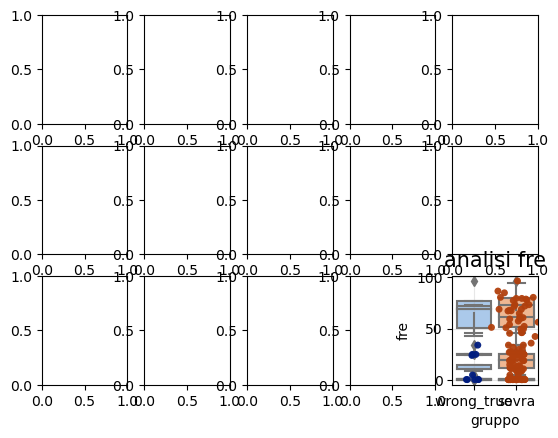

In [49]:
fig, ax = plt.subplots(3,5)
i = 0
for dimensione in df_mann["dimensione"].unique():
    j = 0
    for quartile in df_mann[df_mann["dimensione"] == dimensione]["quartile"].unique():
        to_highligth = df_mann[(df_mann["dimensione"] == dimensione) & (df_mann["quartile"] == quartile)]["gruppo_confronto"].unique()
        
        ax[i,j] = crea_boxplot_e_stripplot_modificato(df_analisi_statement,quartile, dimensione, to_highligth)
        j += 1
    i += 1
        
        
        

In [50]:
df_analisi.columns

Index(['worker_id', 'unit_id', 'doc_id', 'doc_statement_text', 'doc_index',
       'index_iniziali', 'index_finali', 'doc_speaker_party',
       'doc_statement_date', 'trimestre', 'quadrimestre', 'middle_of_the_year',
       'start_or_end_of_the_year', 'quartile', 'doc_truthfulness_index',
       'mean', 'sovra', 'doc_fact_check_ground_truth_label', 'scarto',
       'wrong_false', 'correct_false', 'wrong_true', 'correct_true',
       'numero_parole_frase', 'numero_parole_significative',
       'percentuale_parole_significative', 'fre', 'sentiment', 'subjectivity',
       'sentiment_label', 'subjectivity_label'],
      dtype='object')

In [51]:
df_analisi[["mean","doc_truthfulness_index",'wrong_false', 'correct_false', 'wrong_true', 'correct_true',"doc_statement_text","doc_id","subjectivity_label","sentiment_label"]]

,mean,doc_truthfulness_index,wrong_false,correct_false,wrong_true,correct_true,doc_statement_text,doc_id,subjectivity_label,sentiment_label
0,3.4,4.0,0,0,0,0,"The Obama administration issued an ""11th-hour ...",joni-ernst-target-describing-11th-hour-obama-r...,bassa,neutral
1,1.4,1.0,0,0,0,0,âWeâve got a parole board right now that h...,gop-challenger-overstates-parole-boards-record...,media-bassa,positive
2,1.2,1.0,0,1,0,0,"Says Sens. Lisa Murkowski, Susan Collins and M...",greene-twists-logic-and-facts-pedophilia-charg...,bassa,neutral
3,2.6,1.0,0,0,0,0,"Says U.S. Sen. Ron Johnson, his prospective op...",barnes-partially-right-claim-johnson-has-recei...,bassa,neutral
4,2.7,4.0,0,0,0,0,"""Kathleen Peters refuses to âtake a standâ...",david-jolly-says-kathleen-peters-wont-take-sta...,bassa,neutral
...,...,...,...,...,...,...,...,...,...,...
1194,2.1,0.0,0,0,0,0,"""In Florida children are required to take thei...",fact-checking-bernie-sanders-attack-florida-go...,media-bassa,positive
1195,1.1,0.0,0,0,0,0,Says an image shows the Highland Park shooting...,marjorie-taylor-greene-shared-edited-image-hig...,bassa,negative
1196,3.2,4.0,0,0,1,0,"""Zephyr Teachout says she is against Super PAC...",some-teachouts-donors-also-gave-super-pacs,media-alta,positive
1197,2.6,5.0,0,0,0,0,"âThe student debt that is out there, almost ...",ron-desantis-exaggerates-outstanding-graduate-...,bassa,neutral


In [76]:
for variabile_interesse in ["doc_truthfulness_index", "mean"]:
    for df in DF_no_quartili:
        
        
        results = ols(
            f'''
                {variabile_interesse} ~ subjectivity*sentiment """
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ subjectivity*sentiment in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                
                if index[0] == "C":
                    print(index)
                    index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)

                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
doc_truthfulness_index ~ subjectivity*sentiment in df_correct


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
sentiment,88.325254,1.0,88.325254,33.269057,8.018418e-08,0.215878,0.208039
subjectivity:sentiment,20.819161,1.0,20.819161,7.841855,6.068147e-03,0.050885,0.044110
subjectivity,18.582583,1.0,18.582583,6.999414,9.394286e-03,0.045418,0.038678
Residual,281.416961,106.0,2.654877,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
mean ~ subjectivity*sentiment in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
subjectivity:sentiment,9.388799,1.0,9.388799,38.156891,3.698432e-09,0.148339,0.143892
sentiment,2.850335,1.0,2.850335,11.584008,8.065633e-04,0.045034,0.040987
subjectivity,2.826454,1.0,2.826454,11.486954,8.473034e-04,0.044657,0.040611
Residual,48.227321,196.0,0.246058,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
mean ~ subjectivity*sentiment in df_wrong


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
subjectivity,2.871287,1.0,2.871287,49.273098,3.164760e-10,0.270428,0.263493
sentiment,2.128874,1.0,2.128874,36.532819,2.857738e-08,0.200505,0.193952
subjectivity:sentiment,0.023212,1.0,0.023212,0.398327,5.294545e-01,0.002186,-0.003284
Residual,5.594200,96.0,0.058273,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
mean ~ subjectivity*sentiment in df_correct


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
sentiment,88.325254,1.0,88.325254,64.427971,1.454303e-12,0.323484,0.316872
subjectivity:sentiment,20.819161,1.0,20.819161,15.186328,1.709354e-04,0.076248,0.070872
subjectivity,18.582583,1.0,18.582583,13.554879,3.663921e-04,0.068057,0.062721
Residual,145.316961,106.0,1.370915,NaN,NaN,NaN,NaN


In [66]:
for variabile_interesse in ["correct_true", "wrong_true"]:
    for df in [["df_all",df_all], ["df_true",df_true]]:
        
        results = ols(
        f'''
            {variabile_interesse} ~ subjectivity*sentiment  """
        '''
        , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ subjectivity*sentiment  in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                
                if index[0] == "C":
                    print(index)
                    index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)

                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

----------------------------------------------------------------------------------------------------
wrong_true ~ subjectivity*sentiment  in df_true


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
subjectivity:sentiment,11.765822,1.0,11.765822,89.894040,8.606597e-18,0.314003,0.309429
sentiment,0.049668,1.0,0.049668,0.379476,5.385988e-01,0.001326,-0.002160
subjectivity,0.001417,1.0,0.001417,0.010828,9.172309e-01,0.000038,-0.003443
Residual,25.653549,196.0,0.130885,NaN,NaN,NaN,NaN


<Axes: xlabel='subjectivity', ylabel='sentiment'>

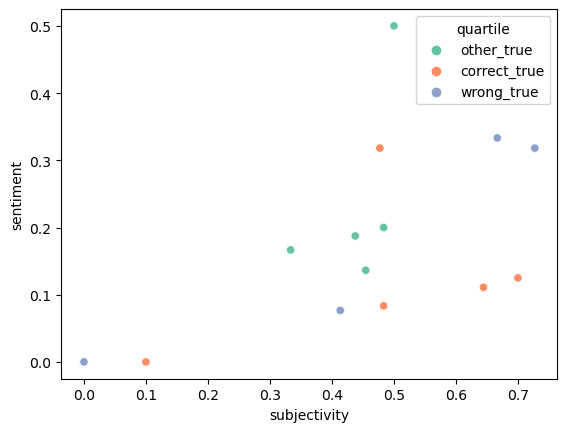

In [79]:
sns.scatterplot(data=df_true, x="subjectivity", y="sentiment", hue="quartile", palette="Set2")

In [95]:
df_category_encoder_false.columns

Index(['worker_id', 'unit_id', 'doc_id', 'doc_statement_text', 'doc_index_0',
       'doc_index_1', 'doc_index_2', 'doc_index_3', 'index_iniziali',
       'index_finali', 'doc_speaker_party_0', 'doc_speaker_party_1',
       'doc_statement_date', 'trimestre', 'quadrimestre',
       'middle_of_the_year_0', 'middle_of_the_year_1',
       'start_or_end_of_the_year', 'quartile', 'doc_truthfulness_index',
       'mean', 'sovra', 'doc_fact_check_ground_truth_label', 'scarto',
       'wrong_false', 'correct_false', 'wrong_true', 'correct_true',
       'numero_parole_frase', 'numero_parole_significative',
       'percentuale_parole_significative', 'fre', 'sentiment', 'subjectivity',
       'sentiment_label', 'subjectivity_label'],
      dtype='object')

In [96]:
for variabile_interesse in ["doc_speaker_party_0"]:
    for df in [["df_false",df_category_encoder_false]]:
        
        results = ols(
        f'''
            {variabile_interesse} ~ percentuale_parole_significative+numero_parole_significative+numero_parole_frase """
        '''
        , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ percentuale_parole_significative+numero_parole_significative+numero_parole_frase  in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                
                if index[0] == "C":
                    print(index)
                    index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)

                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))
        
        

In [124]:
for variabile_interesse in ["correct_false", "wrong_false"]:
    for df in [["df_all",df_all], ["df_false",df_false]]:
        
        results = ols(
        f'''
            {variabile_interesse} ~ (subjectivity+sentiment+fre)*doc_speaker_party """
        '''
        , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > 0.14:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ (subjectivity+sentiment+fre)*doc_speaker_party  in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > 0.14:
                
                if index[0] == "C":
                    print(index)
                    index = index[2:-1]
                    tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                            groups=df[1][index], 
                                            alpha=0.05)

                    df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                    display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))
        
        

----------------------------------------------------------------------------------------------------
correct_false ~ (subjectivity+sentiment+fre)*doc_speaker_party  in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
fre,6.311974,1.0,6.311974,47.280890,8.512585e-11,0.169559,0.165380
doc_speaker_party,1.584680,1.0,1.584680,11.870305,7.011884e-04,0.042569,0.038844
fre:doc_speaker_party,1.170344,1.0,1.170344,8.766657,3.456942e-03,0.031439,0.027753
sentiment,1.034242,1.0,1.034242,7.747163,5.920368e-03,0.027783,0.024110
subjectivity,0.590712,1.0,0.590712,4.424823,3.672903e-02,0.015868,0.012238
sentiment:doc_speaker_party,0.568405,1.0,0.568405,4.257728,4.042453e-02,0.015269,0.011641
subjectivity:doc_speaker_party,0.466977,1.0,0.466977,3.497966,6.297412e-02,0.012544,0.008926
Residual,25.498401,191.0,0.133499,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
wrong_false ~ (subjectivity+sentiment+fre)*doc_speaker_party  in df_false


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
doc_speaker_party,7.004076,1.0,7.004076,55.740080,2.859483e-12,0.178151,0.174397
fre,4.388220,1.0,4.388220,34.922483,1.549872e-08,0.111616,0.108074
subjectivity,1.938098,1.0,1.938098,15.423837,1.199057e-04,0.049296,0.045953
subjectivity:doc_speaker_party,1.441956,1.0,1.441956,11.475422,8.563612e-04,0.036677,0.033374
sentiment:doc_speaker_party,0.260882,1.0,0.260882,2.076157,1.512538e-01,0.006636,0.003429
sentiment,0.227494,1.0,0.227494,1.810451,1.800493e-01,0.005786,0.002582
fre:doc_speaker_party,0.054383,1.0,0.054383,0.432790,5.114151e-01,0.001383,-0.001807
Residual,24.000296,191.0,0.125656,NaN,NaN,NaN,NaN


<Axes: xlabel='subjectivity', ylabel='sentiment'>

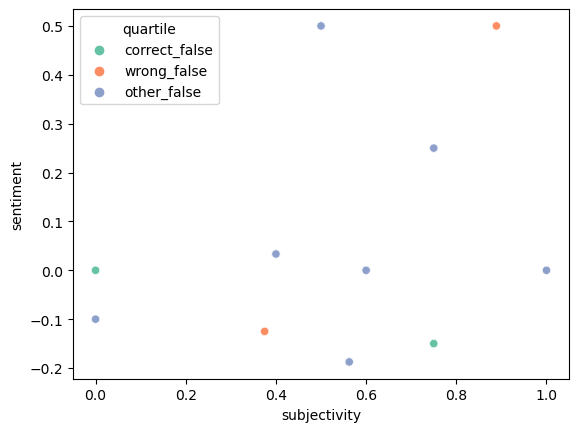

In [93]:
sns.scatterplot(data=df_false, x="subjectivity", y="sentiment", hue="quartile", palette="Set2")

In [62]:
tukey_results = pairwise_tukeyhsd(endog=df[1]["wrong_false"], 
                                            groups=df[1]["sentiment"]*df[1]["subjectivity"], 
                                            alpha=0.05)

df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))


,group1,group2,meandiff,p-adj,lower,upper,reject
1,-0.112500,-0.046875,1.0000,0.0,0.5241,1.4759,True
6,-0.112500,0.444444,1.0000,0.0,0.5241,1.4759,True
7,-0.105469,-0.046875,1.0000,0.0,0.5241,1.4759,True
12,-0.105469,0.444444,1.0000,0.0,0.5241,1.4759,True
13,-0.046875,0.000000,-0.7674,0.0,-1.1167,-0.4182,True
14,-0.046875,0.013333,-1.0000,0.0,-1.4759,-0.5241,True
15,-0.046875,0.187500,-1.0000,0.0,-1.4759,-0.5241,True
16,-0.046875,0.250000,-1.0000,0.0,-1.4759,-0.5241,True
21,0.000000,0.444444,0.7674,0.0,0.4182,1.1167,True
24,0.013333,0.444444,1.0000,0.0,0.5241,1.4759,True


In [59]:
from scipy.stats import chi2_contingency

In [60]:
# Esegui il test chi-square
contingency_table = pd.crosstab(df[1]["subjectivity_label"], df[1]["sentiment_label"])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [61]:
# Stampa i risultati
print("Tabella di contingenza:")
print(contingency_table)
print("\nRisultati del test chi-square:")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")

Tabella di contingenza:
sentiment_label     negative  neutral  positive
subjectivity_label                             
alta                       0       10        10
bassa                     10       99         0
media                     10        0        10
media-alta                10       10        10
media-bassa               10        0        10

Risultati del test chi-square:
Chi-square value: 127.40758551126873
P-value: 9.744209047422719e-24


In [295]:
df_false.groupby(["wrong_false"]).agg({"sentiment":["mean"]})

,sentiment
,mean
wrong_false,
0,0.02321
1,0.07500


In [296]:
df_false.groupby(["wrong_false"]).agg({"subjectivity":["mean"]})

,subjectivity
,mean
wrong_false,
0,0.306208
1,0.252778


In [307]:
df_correct.groupby(["sentiment_label"]).agg({"doc_truthfulness_index":["mean"]})

,doc_truthfulness_index
,mean
sentiment_label,
negative,0.700
neutral,2.150
positive,4.325


In [310]:
df_false.groupby(["wrong_false"]).agg({"sentiment":["mean"]})

,sentiment
,mean
wrong_false,
0,0.02321
1,0.07500


In [ ]:
dfdf_correct.groupby(["subjectivity"]).agg({"subjectivity":["mean"]})

In [251]:
df_to_plot = df_false.groupby(["wrong_false","sentiment_label","subjectivity_label"]).agg({"doc_truthfulness_index":["mean"]})

In [261]:
df_to_plot = df_to_plot.reset_index()

In [272]:
df_to_plot["doc_truthfulness_index"] = df_to_plot["doc_truthfulness_index"]["mean"]

In [276]:
df_to_plot

,wrong_false,sentiment_label,subjectivity_label,doc_truthfulness_index
,,,,mean
0,0,negative,bassa,2.000000
1,0,negative,media,1.500000
2,0,negative,media-alta,0.700000
3,0,neutral,alta,2.200000
4,0,neutral,bassa,1.347826
5,0,neutral,media-alta,2.100000
6,0,positive,media,1.800000
7,0,positive,media-alta,1.400000
8,0,positive,media-bassa,1.700000


In [279]:
df_to_plot["sentiment_subjectivity"] = df_to_plot["sentiment_label"] + "_" + df_to_plot["subjectivity_label"]

In [289]:
wrong_false = df_to_plot["wrong_false"]
mean = df_to_plot["doc_truthfulness_index"]["mean"]
sentiment = df_to_plot["sentiment_label"]
subjectivity = df_to_plot["subjectivity_label"]
sentiment_subjectivity = df_to_plot["sentiment_subjectivity"]

df = pd.DataFrame({"wrong_false":wrong_false, "mean":mean, "sentiment":sentiment, "subjectivity":subjectivity, "sentiment_subjectivity":sentiment_subjectivity})



In [290]:
df.sort_values(by="mean", ascending=False)

,wrong_false,mean,sentiment,subjectivity,sentiment_subjectivity
9,1,3.500000,negative,media-bassa,negative_media-bassa
10,1,3.000000,neutral,bassa,neutral_bassa
11,1,3.000000,positive,alta,positive_alta
3,0,2.200000,neutral,alta,neutral_alta
5,0,2.100000,neutral,media-alta,neutral_media-alta
0,0,2.000000,negative,bassa,negative_bassa
6,0,1.800000,positive,media,positive_media
8,0,1.700000,positive,media-bassa,positive_media-bassa
1,0,1.500000,negative,media,negative_media
7,0,1.400000,positive,media-alta,positive_media-alta


In [291]:
for index, row in df.iterrows():
    if row["sentiment"] == "negative":
        df.loc[index, "sentiment"] = 0
    elif row["sentiment"] == "neutral":
        df.loc[index, "sentiment"] = 1
    elif row["sentiment"] == "positive":
        df.loc[index, "sentiment"] = 2
    
    if row["subjectivity"] == "bassa":
        df.loc[index, "subjectivity"] = 0
    elif row["subjectivity"] == "media-bassa":
        df.loc[index, "subjectivity"] = 1
    elif row["subjectivity"] == "media":
        df.loc[index, "subjectivity"] = 2
    elif row["subjectivity"] == "media-alta":
        df.loc[index, "subjectivity"] = 3
    elif row["subjectivity"] == "alta":
        df.loc[index, "subjectivity"] = 4

In [292]:
df

,wrong_false,mean,sentiment,subjectivity,sentiment_subjectivity
0,0,2.000000,0,0,negative_bassa
1,0,1.500000,0,2,negative_media
2,0,0.700000,0,3,negative_media-alta
3,0,2.200000,1,4,neutral_alta
4,0,1.347826,1,0,neutral_bassa
5,0,2.100000,1,3,neutral_media-alta
6,0,1.800000,2,2,positive_media
7,0,1.400000,2,3,positive_media-alta
8,0,1.700000,2,1,positive_media-bassa
9,1,3.500000,0,1,negative_media-bassa


<Axes: xlabel='sentiment', ylabel='subjectivity'>

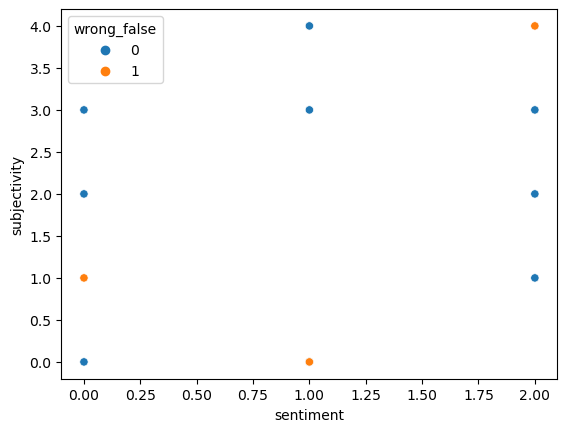

In [293]:
sns.scatterplot(data=df, x="sentiment", y="subjectivity", hue="wrong_false")

## Analisi regressione

In [196]:
dimensioni_da_analizzare = ["sentiment",
                            "subjectivity",
                            "numero_parole_frase",
                            "doc_index","doc_statement_date","fre"]

sentiment


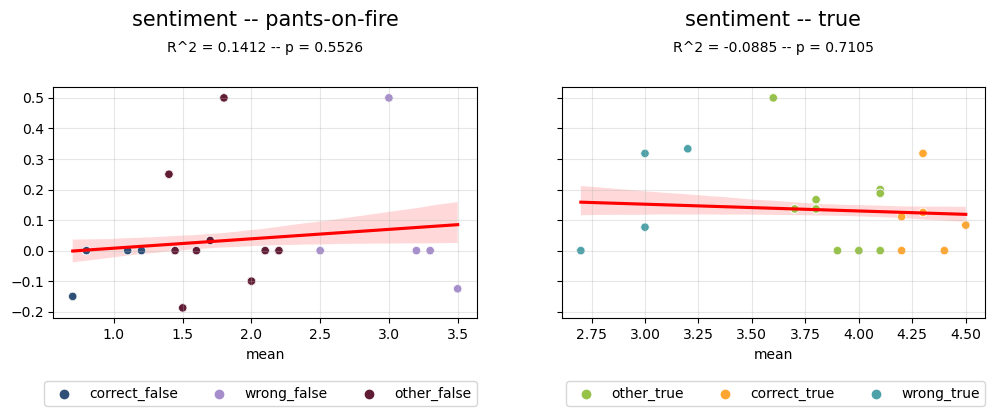

subjectivity


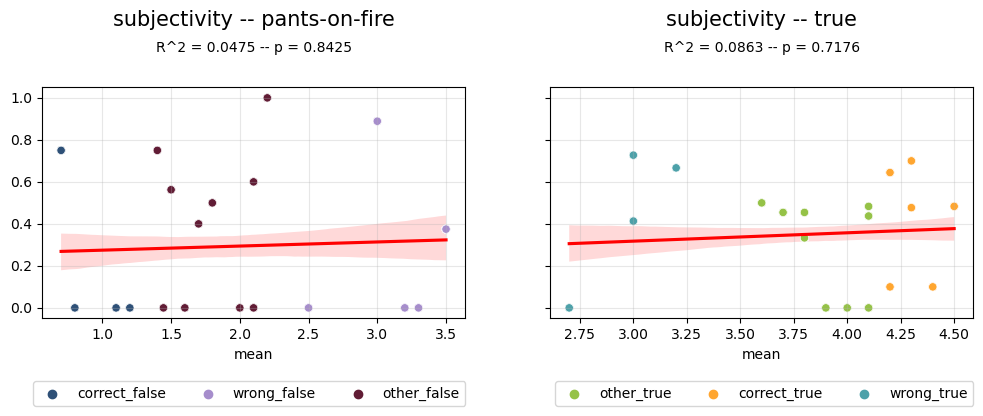

numero_parole_frase


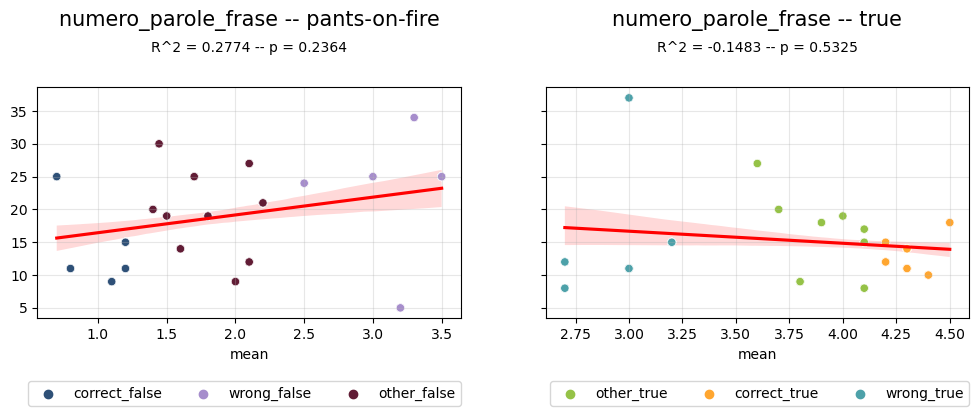

doc_index


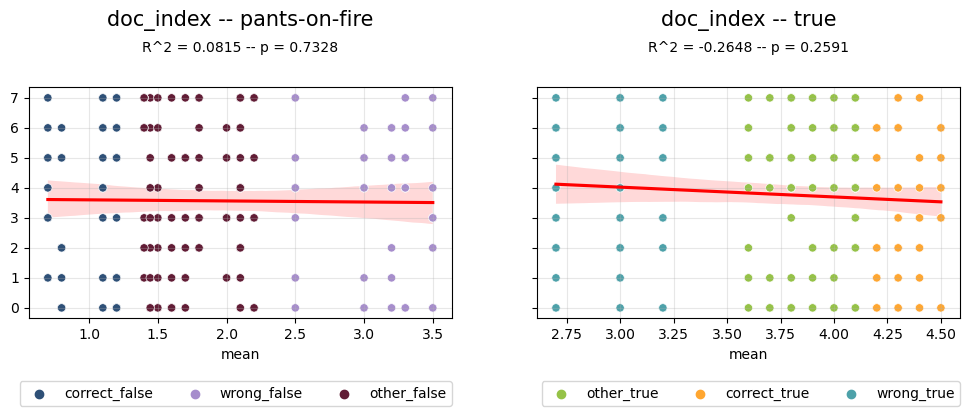

doc_statement_date


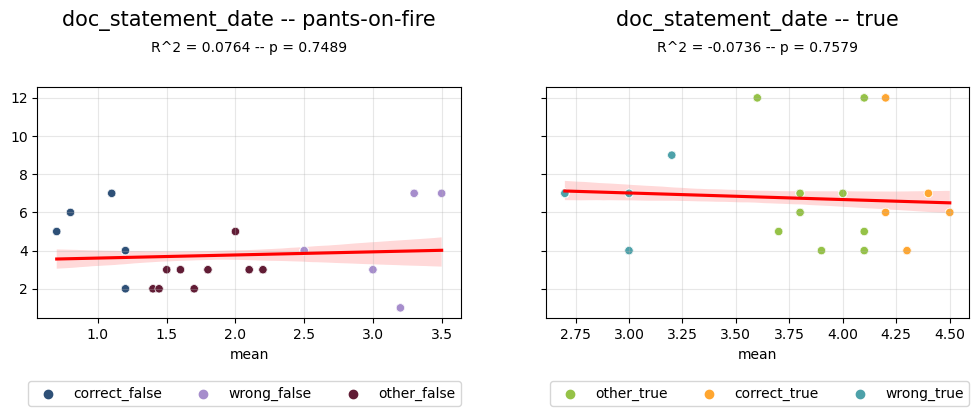

fre


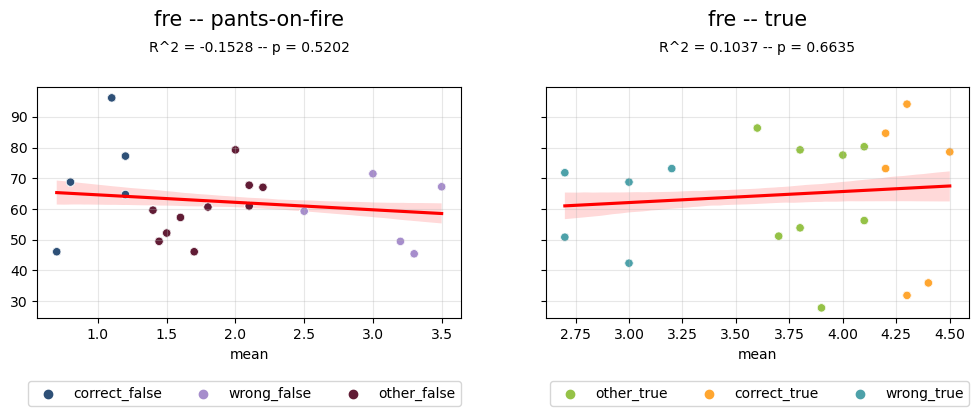

In [197]:
# senza mean
plot_regressione_lineare(df_analisi,dimensioni_da_analizzare)

In [198]:
df_analisi_con_mean = df_analisi.copy()
for dimensione in dimensioni_da_analizzare:
    print(dimensione[:-1]+"_mean")
    df_analisi_con_mean[dimensione[:-1]+"_mean"] = 0

for statement in df_analisi_con_mean["doc_id"].unique():
    for dim in dimensioni_da_analizzare:
        mean = np.asarray(df_analisi_con_mean[df_analisi_con_mean["doc_id"] == statement][dim],dtype = np.float64).mean()
        df_analisi_con_mean.loc[df_analisi_con_mean["doc_id"] == statement, dim[:-1]+"_mean"] = mean 

sentimen_mean
subjectivit_mean
numero_parole_fras_mean
doc_inde_mean
doc_statement_dat_mean
fr_mean


sentiment


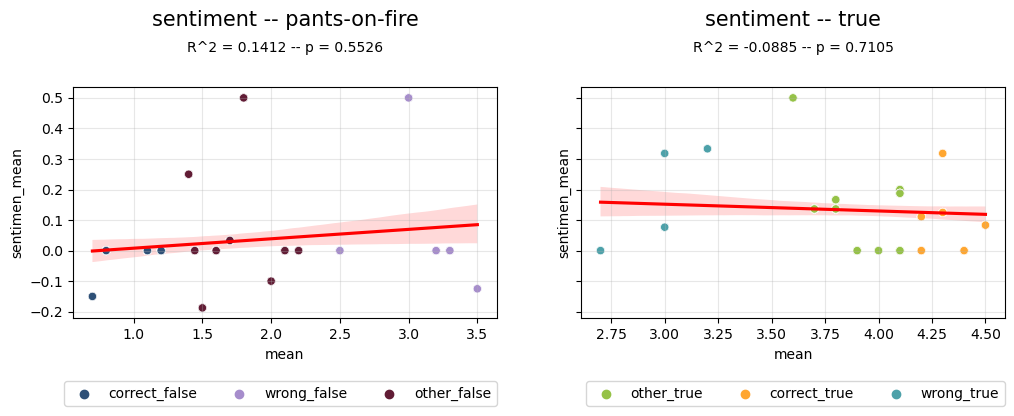

subjectivity


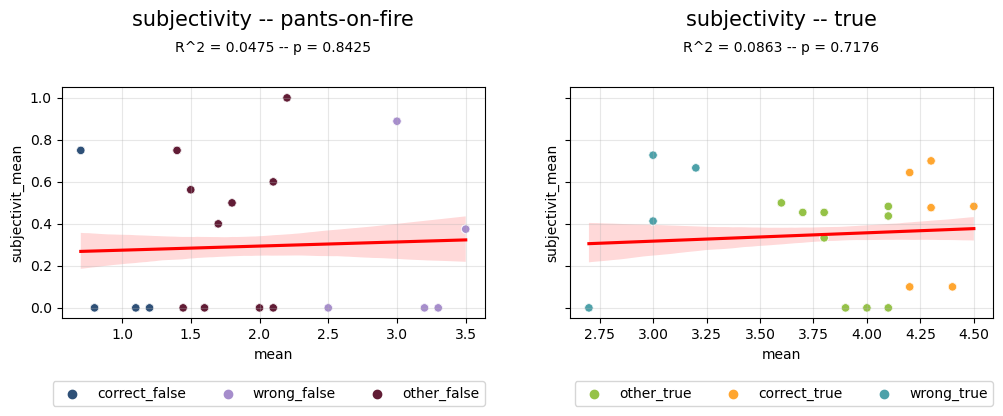

numero_parole_frase


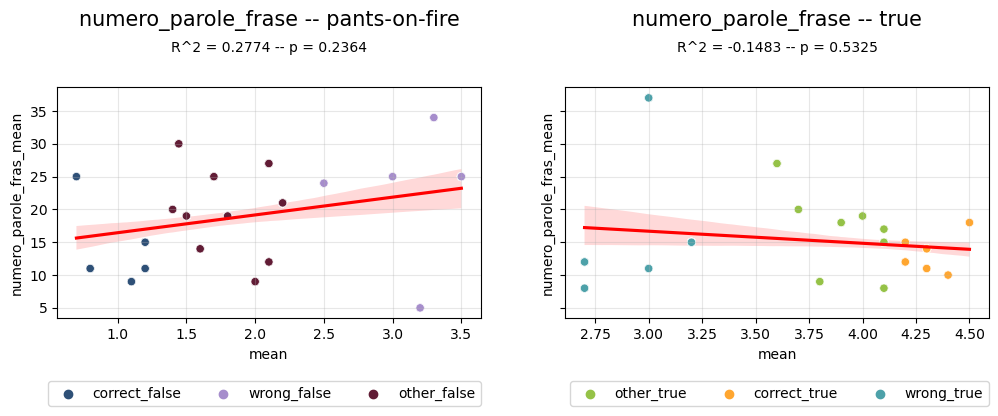

doc_index


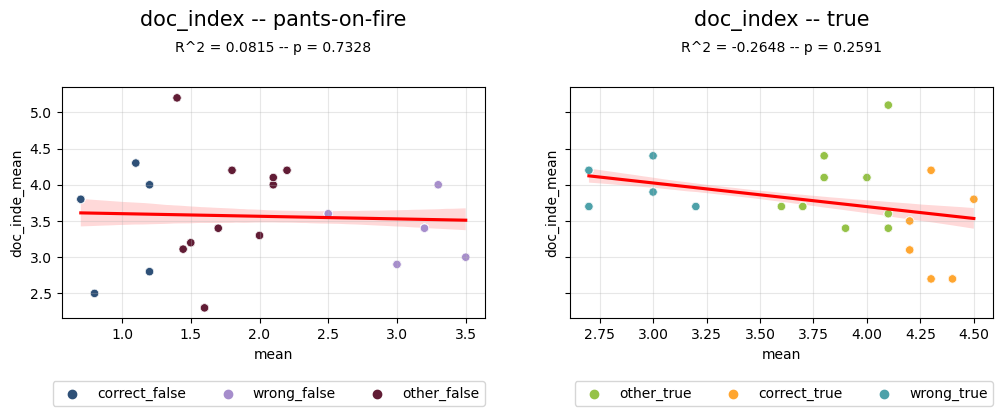

doc_statement_date


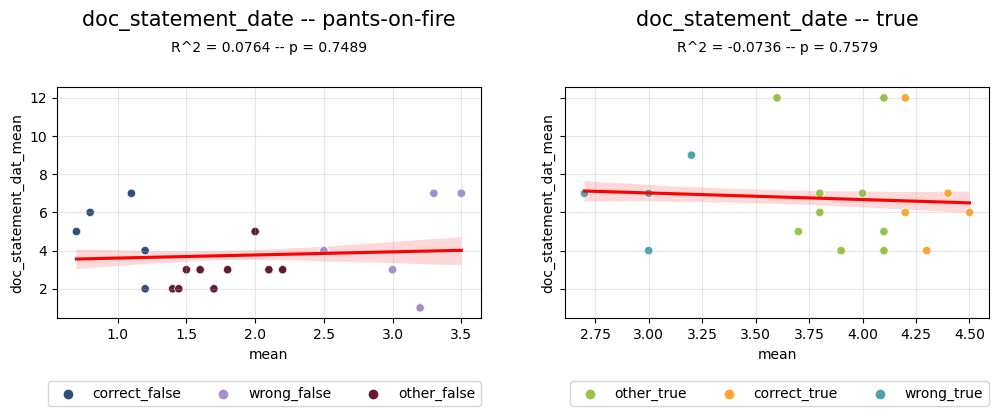

fre


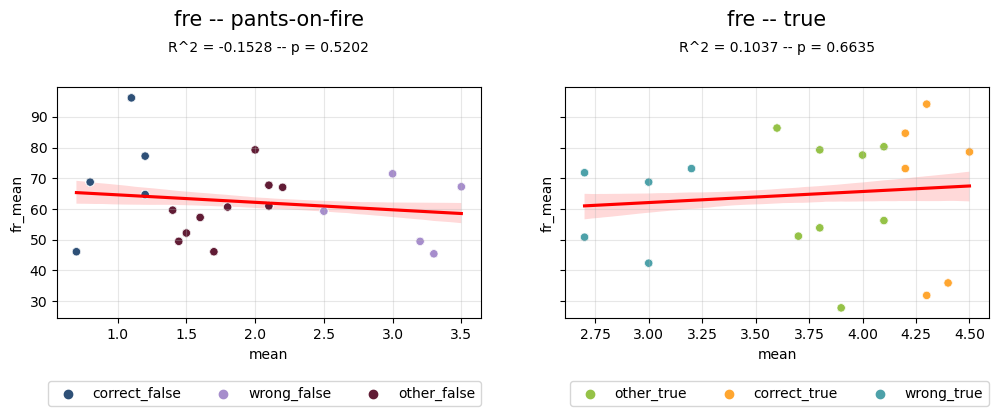

In [199]:
# con mean
plot_regressione_lineare_RQ(df_analisi_con_mean,dimensioni_da_analizzare,1)

## Analisi medie

In [200]:
# verifico se son tutti uguali => poichè son tutti uguali posso fare drop_by_doc_id
for doc_id in df_analisi_con_mean["doc_id"].unique():
    for dim in dimensioni_da_analizzare:
        if len(df_analisi_con_mean[df_analisi_con_mean["doc_id"] == doc_id][dim].unique()) > 1:
            print(doc_id, dim)
    if len(df_analisi_con_mean[df_analisi_con_mean["doc_id"] == doc_id]["quartile"].unique()) > 1:
        print(doc_id,df_analisi_con_mean[df_analisi_con_mean["doc_id"] == doc_id]["quartile"].unique())

joni-ernst-target-describing-11th-hour-obama-rule- doc_index
gop-challenger-overstates-parole-boards-record-und doc_index
greene-twists-logic-and-facts-pedophilia-charge-ag doc_index
barnes-partially-right-claim-johnson-has-received- doc_index
david-jolly-says-kathleen-peters-wont-take-stand-r doc_index
john-boehner-says-stimulus-bill-was-rushed-passage doc_index
ron-desantis-exaggerates-outstanding-graduate-stud doc_index
ohios-mandel-repeats-false-claim-stolen-2020-elect doc_index
lauren-boebert-wrong-founding-fathers-intent-exper doc_index
hard-pin-down-growing-cost-unused-border-materials doc_index
yes-tax-break-ron-johnson-pushed-2017-has-benefite doc_index
suozzi-calling-hochul-interim-governor-s-misleadin doc_index
fact-checking-claim-about-number-immigrants-becomi doc_index
nikki-frieds-ad-misleads-crists-position-abortion- doc_index
marjorie-taylor-greene-shared-edited-image-highlan doc_index
virginia-975-abortions-occur-15-weeks-pregnancy-or doc_index
susan-collins-says-year-

non sono uguali quinidi mi fermo

## Analisi scarto

In [201]:
dimensioni_da_analizzare = ["doc_index", 
                            "doc_speaker_party",
                            "doc_statement_date"] + ["numero_parole_significative", 
                            "fre",
                            "sentiment",
                            "subjectivity",
                            "numero_parole_frase"]

In [202]:
analizza_scarto(df_analisi,quartili,dimensioni_da_analizzare,solo_quartile_vs_sovra = True)

quartile vs sovra =>  doc_speaker_party wrong_true -> 0.017613387982186462


## Analisi bias

In [203]:
# doc_truthfulness_index

# confronto a sigolo vs tutti altri

dimensioni_da_analizzare = ["doc_index", "doc_speaker_party",
                            "doc_statement_date",
                            "numero_parole_significative",
                            "fre",
                            "sentiment_label",
                            "subjectivity_label"]

for dimensione in dimensioni_da_analizzare:
    
    for value in df_analisi[dimensione].unique():
        group1 = df_analisi[df_analisi[dimensione] == value]["doc_truthfulness_index"]
        # tutti
        group2 = df_analisi[df_analisi[dimensione] != value]["doc_truthfulness_index"]
        p = test_mann_whitney_u(group1,group2)
        if p < 0.05:
            print(dimensione,value,p)

doc_speaker_party DEM 4.565785150836475e-06
doc_speaker_party REP 4.565785150836475e-06
doc_statement_date 4.0 0.002523857059023339
doc_statement_date 12.0 0.03191483507669884
doc_statement_date 2.0 1.8291881019995e-06
numero_parole_significative 10 0.0007681057002256079
numero_parole_significative 9 0.004158997614005592
numero_parole_significative 14 0.01601480166104866
numero_parole_significative 15 0.005737043531636827
numero_parole_significative 18 0.016223780174728742
fre 85.02 0.014582134324346453
fre 77.23 0.007207675196194772
fre 77.57 0.013738523694966264
fre 59.64 0.0002446194811783005
fre 60.31 0.015490931142116712
fre 46.1 0.0007331825617801705
fre 29.52 0.0004770056461583148
fre 64.71 0.0038362823403101723
fre 46.78 0.04139682971837982
fre 56.25 0.0069088723317487525
fre 43.39 0.04719463522886346
fre 78.59 0.0003932039542660512
fre 52.19 0.022334447357219064
fre 71.14 0.02978763335632958
fre 27.83 0.025037047378520954
fre 79.6 0.009082215571486271
fre 73.17 0.0111636240463

In [204]:
# doc_truthfulness_index

# confronto a coppie

dimensioni_da_analizzare = ["doc_index", "doc_speaker_party",
                            "doc_statement_date",
                            "numero_parole_significative",
                            "fre",
                            "sentiment_label",
                            "subjectivity_label"]

for dimensione in dimensioni_da_analizzare:
    
    for value in df_analisi[dimensione].unique():
        group1 = df_analisi[df_analisi[dimensione] == value]["doc_truthfulness_index"]
        for value2 in df_analisi[dimensione].unique():
            if value != value2:
                group2 = df_analisi[df_analisi[dimensione] == value2]["doc_truthfulness_index"]
                p = test_mann_whitney_u(group1,group2)
                if p < 0.05:
                    print(dimensione,value,value2,p)


doc_speaker_party DEM REP 4.565785150836475e-06
doc_speaker_party REP DEM 4.565785150836475e-06
doc_statement_date 3.0 4.0 0.0011955466148185396
doc_statement_date 3.0 12.0 0.005728039946953693
doc_statement_date 3.0 2.0 0.0020949013929864894
doc_statement_date 6.0 4.0 0.00886234086298026
doc_statement_date 6.0 12.0 0.028541838394619882
doc_statement_date 6.0 2.0 5.720193322648154e-05
doc_statement_date 4.0 3.0 0.0011955466148185396
doc_statement_date 4.0 6.0 0.00886234086298026
doc_statement_date 4.0 5.0 0.03362375761328176
doc_statement_date 4.0 7.0 0.020732530719122753
doc_statement_date 4.0 2.0 1.343859055142526e-07
doc_statement_date 4.0 11.0 0.005518183867113818
doc_statement_date 5.0 4.0 0.03362375761328176
doc_statement_date 5.0 2.0 9.473572879291415e-06
doc_statement_date 7.0 4.0 0.020732530719122753
doc_statement_date 7.0 2.0 3.5740630048445772e-06
doc_statement_date 1.0 2.0 0.004054713654783149
doc_statement_date 12.0 3.0 0.005728039946953693
doc_statement_date 12.0 6.0 0.02

In [205]:
dimensioni_da_analizzare = ["doc_index", "doc_speaker_party",
                            "doc_statement_date",
                            "numero_parole_significative",
                            "fre",
                            "sentiment_label",
                            "subjectivity_label"]

for dimensione in ["sentiment_label"]:
    print(df_analisi[[dimensione,"doc_truthfulness_index"]].groupby(dimensione).mean())

                 doc_truthfulness_index
sentiment_label                        
negative                       2.505000
neutral                        2.741021
positive                       2.831915


# Analisi parole

In [206]:
testi = df_analisi["doc_statement_text"].str.cat(sep=' ')
lista_parole = testi.split() 

In [207]:
import re

# tolgo cose che non sono lettere

for i in range(len(lista_parole)):
    lista_parole[i] = re.sub(r'[^a-zA-Z]', '', lista_parole[i]) 

lista_parole 

['The',
 'Obama',
 'administration',
 'issued',
 'an',
 'thhour',
 'rule',
 'that',
 'entrenches',
 'federal',
 'family',
 'planning',
 'funding',
 'for',
 'Planned',
 'Parenthood',
 'Weve',
 'got',
 'a',
 'parole',
 'board',
 'right',
 'now',
 'that',
 'has',
 'released',
 '',
 'cop',
 'killers',
 'in',
 'the',
 'last',
 'two',
 'years',
 'under',
 'Hochul',
 'Says',
 'Sens',
 'Lisa',
 'Murkowski',
 'Susan',
 'Collins',
 'and',
 'Mitt',
 'Romney',
 'are',
 'propedophile',
 'Says',
 'US',
 'Sen',
 'Ron',
 'Johnson',
 'his',
 'prospective',
 'opponent',
 'has',
 'received',
 '',
 'million',
 'from',
 'the',
 'gun',
 'lobby',
 'Kathleen',
 'Peters',
 'refuses',
 'to',
 'take',
 'a',
 'stand',
 'to',
 'repeal',
 'Obamacare',
 'Members',
 'of',
 'Congress',
 'did',
 'not',
 'have',
 'three',
 'days',
 'to',
 'read',
 'the',
 'bill',
 'when',
 'the',
 'stimulus',
 'was',
 'rushed',
 'into',
 'law',
 'The',
 'student',
 'debt',
 'that',
 'is',
 'out',
 'there',
 'almost',
 '',
 'of',
 'it',


In [208]:
# inizializzo dizionario
frequenza_parole = {}

for parola in lista_parole:
    frequenza_parole[parola] = { "pants-on-fire" : [0,0,0],
                                 "other":  [0,0,0],
                                 "true":  [0,0,0],
                                 "wrong_false":  [0,0,0],
                                 "other_false": [0,0,0],
                                 "correct_false":  [0,0,0],
                                 "wrong_true":  [0,0,0],
                                 "other_true":  [0,0,0],
                                 "correct_true":  [0,0,0],
                                 "all" : [0,0,0],
        
    }

In [209]:
# riempio dizionario

for index, row in df_analisi.iterrows():
    
    for parola in row["doc_statement_text"].split():
        parola = re.sub(r'[^a-zA-Z]', '', parola)
        frequenza_parole[parola]["all"][0] += 1  
        if row["sovra"] == "true":
            
            # frequenza assoluta
            frequenza_parole[parola]["true"][0] += 1
            frequenza_parole[parola][row["quartile"]][0] += 1
            # frequenza relativa
            frequenza_parole[parola]["true"][1] = frequenza_parole[parola]["true"][0] / frequenza_parole[parola]["all"][0]
            frequenza_parole[parola][row["quartile"]][1] = frequenza_parole[parola][row["quartile"]][0] / frequenza_parole[parola]["all"][0]
            
        elif row["sovra"] == "pants-on-fire":
            # frequenza assoluta
            frequenza_parole[parola]["pants-on-fire"][0] += 1
            frequenza_parole[parola][row["quartile"]][0] += 1
            # frequenza relativa
            frequenza_parole[parola]["pants-on-fire"][1] = frequenza_parole[parola]["pants-on-fire"][0] / frequenza_parole[parola]["all"][0]
            frequenza_parole[parola][row["quartile"]][1] = frequenza_parole[parola][row["quartile"]][0] / frequenza_parole[parola]["all"][0]
            
        else:
            frequenza_parole[parola]["other"][0] += 1
            frequenza_parole[parola]["other"][1] = frequenza_parole[parola]["other"][0] / frequenza_parole[parola]["all"][0]
            





In [210]:
for parola in frequenza_parole.keys():
    for quartile in frequenza_parole[parola].keys() :
        if quartile != "all":
            if quartile == "pants-on-fire" or quartile == "true":
                frequenza_parole[parola][quartile][2] = df_analisi[(df_analisi["doc_statement_text"].str.contains(parola)) & (df_analisi["sovra"] == quartile)]["doc_truthfulness_index"].mean()
            else:
                frequenza_parole[parola][quartile][2] = df_analisi[(df_analisi["doc_statement_text"].str.contains(parola)) & (df_analisi["quartile"] == quartile)]["doc_truthfulness_index"].mean()
        else:
            frequenza_parole[parola][quartile][2] = df_analisi[(df_analisi["doc_statement_text"].str.contains(parola))]["doc_truthfulness_index"].mean()

In [211]:
interessanti = {}

for parola in lista_parole:
    for quartile in ["wrong_false","correct_false","wrong_true","correct_true"] :
        if frequenza_parole[parola][quartile][1] > 0.5 and frequenza_parole[parola][quartile][0] > 10:
            interessanti[parola] = [frequenza_parole[parola][quartile][1],frequenza_parole[parola][quartile][0],quartile, frequenza_parole[parola][quartile][2]]

CI sono parole che compaiono solo nei quartili o che compaiono nella loro interezza

In [212]:
interessanti

{'items': [1.0, 20, 'wrong_true', 3.0],
 'Schimel': [1.0, 20, 'wrong_true', 3.0],
 'taking': [0.6666666666666666, 20, 'wrong_true', 3.1],
 'likely': [0.6666666666666666, 20, 'correct_true', 4.35],
 'as': [0.7407407407407407, 20, 'correct_false', 0.8666666666666667],
 'die': [1.0, 20, 'correct_true', 4.35],
 'should': [0.5714285714285714, 20, 'wrong_false', 3.3],
 'Super': [1.0, 20, 'wrong_true', 3.2],
 'ask': [1.0, 20, 'wrong_false', 3.3],
 'permission': [1.0, 20, 'wrong_false', 3.3],
 'youre': [1.0, 20, 'correct_true', nan]}

## Salvo DataFrame

In [213]:
df_analisi.to_csv(index=False, path_or_buf = "../../Datasets/df_Q2.csv")

Analisi Anova 

In [214]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [215]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq']) 
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

In [216]:
df_analisi[["quartile","doc_index", "doc_speaker_party","doc_statement_date"]]

,quartile,doc_index,doc_speaker_party,doc_statement_date
0,other,6.0,DEM,3.0
1,other,7.0,DEM,6.0
2,correct_false,0.0,REP,4.0
3,other,2.0,DEM,5.0
4,other,3.0,DEM,7.0
...,...,...,...,...
1194,other,0.0,DEM,7.0
1195,other,1.0,REP,7.0
1196,wrong_true,3.0,REP,9.0
1197,other,4.0,REP,4.0


In [217]:
df_for_anova = df_analisi.copy()

In [218]:
variabili = ["quartile","doc_index", "doc_speaker_party","doc_statement_date"]
mapped_values = {}


for dim in variabili:
    mapped_values[dim] = {}
    i = 0
    for val in df_for_anova[dim].unique():
        print(dim,val)
        mapped_values[dim][val] = i
        i += 1

for index, row in df_for_anova.iterrows():
    for dim in variabili:
        df_for_anova.loc[index, dim+"_intero"] = mapped_values[dim][row[dim]]
    

    
    


quartile other
quartile correct_false
quartile other_true
quartile correct_true
quartile wrong_false
quartile wrong_true
quartile other_false
doc_index 6.0
doc_index 7.0
doc_index 0.0
doc_index 2.0
doc_index 3.0
doc_index 5.0
doc_index 1.0
doc_index 4.0
doc_speaker_party DEM
doc_speaker_party REP
doc_statement_date 3.0
doc_statement_date 6.0
doc_statement_date 4.0
doc_statement_date 5.0
doc_statement_date 7.0
doc_statement_date 1.0
doc_statement_date 12.0
doc_statement_date 2.0
doc_statement_date 10.0
doc_statement_date 11.0
doc_statement_date 9.0


In [219]:
df_for_anova[["quartile","doc_index", "doc_speaker_party","doc_statement_date",
              "quartile_intero","doc_index_intero", "doc_speaker_party_intero","doc_statement_date_intero"]]

,quartile,doc_index,doc_speaker_party,doc_statement_date,quartile_intero,doc_index_intero,doc_speaker_party_intero,doc_statement_date_intero
0,other,6.0,DEM,3.0,0.0,0.0,0.0,0.0
1,other,7.0,DEM,6.0,0.0,1.0,0.0,1.0
2,correct_false,0.0,REP,4.0,1.0,2.0,1.0,2.0
3,other,2.0,DEM,5.0,0.0,3.0,0.0,3.0
4,other,3.0,DEM,7.0,0.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...
1194,other,0.0,DEM,7.0,0.0,2.0,0.0,4.0
1195,other,1.0,REP,7.0,0.0,6.0,1.0,4.0
1196,wrong_true,3.0,REP,9.0,5.0,4.0,1.0,10.0
1197,other,4.0,REP,4.0,0.0,7.0,1.0,2.0


In [220]:
type(df_for_anova["doc_statement_date_intero"][0])

numpy.float64

In [221]:
df_for_anova = df_for_anova[["quartile","doc_index", "doc_speaker_party","doc_statement_date",
              "quartile_intero","doc_index_intero", "doc_speaker_party_intero","doc_statement_date_intero"]]

In [222]:
df_for_anova['doc_statement_date_intero'] = pd.to_numeric(df_for_anova["doc_statement_date_intero"])
df_for_anova['doc_index_intero'] = pd.to_numeric(df_for_anova["doc_index_intero"])
df_for_anova['doc_speaker_party_intero'] = pd.to_numeric(df_for_anova["doc_speaker_party_intero"])
df_for_anova['quartile_intero'] = pd.to_numeric(df_for_anova["quartile_intero"])

In [223]:
df_for_anova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   quartile                   1199 non-null   object 
 1   doc_index                  1199 non-null   object 
 2   doc_speaker_party          1199 non-null   object 
 3   doc_statement_date         1199 non-null   object 
 4   quartile_intero            1199 non-null   float64
 5   doc_index_intero           1199 non-null   float64
 6   doc_speaker_party_intero   1199 non-null   float64
 7   doc_statement_date_intero  1199 non-null   float64
dtypes: float64(4), object(4)
memory usage: 75.1+ KB


In [224]:
df_for_anova = df_for_anova[df_for_anova["quartile"] != "other"]
df_for_anova = df_for_anova[df_for_anova["quartile"] != "other_true"]
df_for_anova = df_for_anova[df_for_anova["quartile"] != "other_false"]


In [225]:
results = ols(
    '''
        quartile_intero ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)
    '''
    , data=df_for_anova).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
anova_table_v = anova_table(aov_table)
display(anova_table_v.sort_values(by="omega_sq", ascending=False))

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_statement_date),204.807141,8.0,25.600893,22.590530,3.757813e-24,0.455586,0.434324
C(doc_speaker_party),20.935911,1.0,20.935911,18.474095,2.729786e-05,0.046571,0.043940
C(doc_index),5.084448,7.0,0.726350,0.640940,7.216390e-01,0.011310,-0.006320
Residual,218.718743,193.0,1.133258,NaN,NaN,NaN,NaN


In [226]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [227]:
tukey_results = pairwise_tukeyhsd(endog=df_for_anova['quartile_intero'], 
                                  groups=df_for_anova['doc_statement_date'], 
                                  alpha=0.05)
df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True)

,group1,group2,meandiff,p-adj,lower,upper,reject
0,1.0,2.0,-3.0000,0.0000,-4.5428,-1.4572,True
3,1.0,5.0,-3.0000,0.0000,-4.5428,-1.4572,True
30,6.0,7.0,1.5238,0.0000,0.7710,2.2766,True
8,2.0,3.0,3.0000,0.0000,1.4572,4.5428,True
9,2.0,4.0,2.2000,0.0000,1.0050,3.3950,True
28,5.0,9.0,4.0000,0.0000,2.4572,5.5428,True
12,2.0,7.0,2.8571,0.0000,1.6909,4.0234,True
13,2.0,9.0,4.0000,0.0000,2.4572,5.5428,True
27,5.0,7.0,2.8571,0.0000,1.6909,4.0234,True
16,3.0,5.0,-3.0000,0.0000,-4.5428,-1.4572,True


In [228]:
tukey_results = pairwise_tukeyhsd(endog=df_for_anova['quartile_intero'], 
                                  groups=df_for_anova['doc_speaker_party'], 
                                  alpha=0.05)
df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True)

,group1,group2,meandiff,p-adj,lower,upper,reject


In [229]:
tukey_results = pairwise_tukeyhsd(endog=df_for_anova['quartile_intero'], 
                                  groups=df_for_anova['doc_index'], 
                                  alpha=0.05)
df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True)

,group1,group2,meandiff,p-adj,lower,upper,reject


In [230]:
df_for_anova["trimestre_pubblicazione"] = 0

for index, row in df_for_anova.iterrows():
    df_for_anova.loc[index, "trimestre_pubblicazione"] = int(row["doc_statement_date"])//4


In [231]:
results = ols(
    '''
        quartile_intero ~ C(doc_index) + C(doc_speaker_party) + C(trimestre_pubblicazione)
    '''
    , data=df_for_anova).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
anova_table_v = anova_table(aov_table)
display(anova_table_v.sort_values(by="omega_sq", ascending=False))

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(trimestre_pubblicazione),29.671674,3.0,9.890558,4.972222,0.002389,0.068295,0.054311
C(doc_speaker_party),0.630746,1.0,0.630746,0.317091,0.573998,0.001452,-0.003112
C(doc_index),10.308686,7.0,1.472669,0.740346,0.638010,0.023727,-0.008284
Residual,393.854210,198.0,1.989163,NaN,NaN,NaN,NaN


In [232]:
tukey_results = pairwise_tukeyhsd(endog=df_for_anova['quartile_intero'], 
                                  groups=df_for_anova['trimestre_pubblicazione'], 
                                  alpha=0.05)
df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True)

,group1,group2,meandiff,p-adj,lower,upper,reject
3,1,2,1.8125,0.0006,0.6296,2.9954,True
1,0,2,2.0000,0.0007,0.6749,3.3251,True
5,2,3,-2.0000,0.0088,-3.6229,-0.3771,True


In [233]:
results = ols(
    '''
        quartile_intero ~ C(doc_speaker_party) + C(trimestre_pubblicazione)
    '''
    , data=df_for_anova).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
anova_table_v = anova_table(aov_table)
display(anova_table_v.sort_values(by="omega_sq", ascending=False))

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(trimestre_pubblicazione),30.291650,3.0,10.097217,5.121523,0.001948,0.069689,0.055829
C(doc_speaker_party),0.212104,1.0,0.212104,0.107584,0.743247,0.000488,-0.004029
Residual,404.162896,205.0,1.971526,NaN,NaN,NaN,NaN


In [234]:
df_for_anova["quartile"].unique()

array(['correct_false', 'correct_true', 'wrong_false', 'wrong_true'],
      dtype=object)

In [235]:
## analisi dei singoli gruppi

df_for_anova = df_all.copy()

df_for_anova["correct_false"] = 0
df_for_anova["correct_true"] = 0
df_for_anova["wrong_false"] = 0
df_for_anova["wrong_true"] = 0

for index, row in df_for_anova.iterrows():
    for dim in variabili:
        if row ["quartile"] == "correct_false":
            df_for_anova.loc[index, "correct_false"] = 1
        if row ["quartile"] == "correct_true":
            df_for_anova.loc[index, "correct_true"] = 1
        if row ["quartile"] == "wrong_false":
            df_for_anova.loc[index, "wrong_false"] = 1
        if row ["quartile"] == "wrong_true":
            df_for_anova.loc[index, "wrong_true"] = 1
        
            
        
        
        


In [236]:
for quartile in ["correct_false", "correct_true", "wrong_false", "wrong_true"]:

    print(f"""{quartile} ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)""")
    
    results = ols(
        f'''
            {quartile} ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)"""
        '''
        , data=df_for_anova).fit()
    aov_table = sm.stats.anova_lm(results, typ=2)
    anova_table_v = anova_table(aov_table)
    display(anova_table_v.sort_values(by="omega_sq", ascending=False))

correct_false ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_statement_date),1.834954,10.0,0.183495,4.830562,7.647897e-07,0.038759,0.030710
C(doc_speaker_party),0.470501,1.0,0.470501,12.386062,4.490219e-04,0.009938,0.009128
C(doc_index),0.213752,7.0,0.030536,0.803869,5.840817e-01,0.004515,-0.001101
Residual,44.823887,1180.0,0.037986,NaN,NaN,NaN,NaN


correct_true ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_statement_date),4.094580,10.0,0.409458,9.673465,1.191378e-15,0.071963,0.064476
C(doc_speaker_party),2.538267,1.0,2.538267,59.966690,2.066230e-14,0.044610,0.043834
C(doc_index),0.318762,7.0,0.045537,1.075823,3.765519e-01,0.005602,0.000395
Residual,49.946988,1180.0,0.042328,NaN,NaN,NaN,NaN


wrong_false ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_statement_date),10.633160,10.0,1.063316,34.104108,1.176681e-58,0.222528,0.215862
C(doc_index),0.356886,7.0,0.050984,1.635219,1.214952e-01,0.007469,0.002899
C(doc_speaker_party),0.002761,1.0,0.002761,0.088552,7.660787e-01,0.000058,-0.000594
Residual,36.790668,1180.0,0.031179,NaN,NaN,NaN,NaN


wrong_true ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_statement_date),9.672393,10.0,0.967239,32.296686,1.149248e-55,0.208156,0.201581
C(doc_speaker_party),1.214974,1.0,1.214974,40.568690,2.714346e-10,0.026147,0.025486
C(doc_index),0.240343,7.0,0.034335,1.146454,3.312785e-01,0.005172,0.000660
Residual,35.339302,1180.0,0.029949,NaN,NaN,NaN,NaN


In [237]:
df_for_anova.columns[20:]

Index(['correct_false', 'wrong_true', 'correct_true', 'numero_parole_frase',
       'numero_parole_significative', 'percentuale_parole_significative',
       'fre', 'sentiment', 'subjectivity', 'sentiment_label',
       'subjectivity_label'],
      dtype='object')

In [238]:
df_for_anova["sovra"]

0               other
1               other
2       pants-on-fire
3               other
4               other
            ...      
1194            other
1195            other
1196             true
1197            other
1198            other
Name: sovra, Length: 1199, dtype: object

In [239]:
for quartile in ["correct_false", "wrong_false"]:

    print(f"""{quartile} ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)""")
    
    results = ols(
        f'''
            {quartile} ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)"""
        '''
        , data=df_for_anova[df_for_anova["sovra"] == "pants-on-fire"]).fit()
    aov_table = sm.stats.anova_lm(results, typ=2)
    anova_table_v = anova_table(aov_table)
    display(anova_table_v.sort_values(by="omega_sq", ascending=False))

correct_false ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_statement_date),12.760351,6.0,2.126725,16.980311,1.429990e-15,0.346729,0.325203
C(doc_speaker_party),0.405831,1.0,0.405831,3.240261,7.348729e-02,0.011027,0.007598
C(doc_index),0.590535,7.0,0.084362,0.673569,6.942770e-01,0.016046,-0.007750
Residual,23.045362,184.0,0.125247,NaN,NaN,NaN,NaN


wrong_false ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_statement_date),11.307880,6.0,1.884647,18.192782,1.542679e-16,0.359147,0.338293
C(doc_index),0.938870,7.0,0.134124,1.294723,2.550947e-01,0.029819,0.006766
C(doc_speaker_party),0.177515,1.0,0.177515,1.713582,1.921537e-01,0.005638,0.002340
Residual,19.061130,184.0,0.103593,NaN,NaN,NaN,NaN


In [240]:
for quartile in ["correct_true", "wrong_true"]:

    print(f"""{quartile} ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)""")
    
    results = ols(
        f'''
            {quartile} ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)"""
        '''
        , data=df_for_anova[df_for_anova["sovra"] == "true"]).fit()
    aov_table = sm.stats.anova_lm(results, typ=2)
    anova_table_v = anova_table(aov_table)
    display(anova_table_v.sort_values(by="omega_sq", ascending=False))

correct_true ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),12.225242,1.0,12.225242,115.244884,3.138846e-21,0.295581,0.292267
C(doc_statement_date),8.588360,5.0,1.717672,16.192147,3.029976e-13,0.207649,0.194326
C(doc_index),0.815464,7.0,0.116495,1.098173,3.660548e-01,0.019716,0.001758
Residual,19.730984,186.0,0.106081,NaN,NaN,NaN,NaN


wrong_true ~ C(doc_index) + C(doc_speaker_party) + C(doc_statement_date)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(doc_speaker_party),5.915349,1.0,5.915349,65.890650,6.360367e-14,0.241017,0.236494
C(doc_statement_date),1.578758,5.0,0.315752,3.517135,4.620150e-03,0.064325,0.045869
C(doc_index),0.350985,7.0,0.050141,0.558513,7.888559e-01,0.014301,-0.011263
Residual,16.698196,186.0,0.089775,NaN,NaN,NaN,NaN
